In [ ]:
import csv
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import folium
from geopy.geocoders import Nominatim
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from wordcloud import WordCloud,STOPWORDS
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import folium
from folium.plugins import HeatMap
from plotly.offline import init_notebook_mode, iplot
import warnings
warnings.filterwarnings("ignore")

Loading all the crime datasets separately

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DV 1/LA crime2010-present/Crime_Data_from_2020_to_Present.csv")
df1 = pd.read_csv("/content/drive/MyDrive/DV 1/LAPD crime2010-2020/Crime_Data_from_2010_to_2019.csv")
df2 = pd.read_csv("/content/drive/MyDrive/DV 1/LAPD crime2010-2020/Crime_Data_from_2020_to_Present.csv")

**Getting information about the dataset,name of columns and dtypes**

In [ ]:
df.info(),df1.info(),df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317854 entries, 0 to 317853
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           317854 non-null  int64  
 1   Date Rptd       317854 non-null  object 
 2   DATE OCC        317854 non-null  object 
 3   TIME OCC        317854 non-null  int64  
 4   AREA            317854 non-null  int64  
 5   AREA NAME       317854 non-null  object 
 6   Rpt Dist No     317854 non-null  int64  
 7   Part 1-2        317854 non-null  int64  
 8   Crm Cd          317854 non-null  int64  
 9   Crm Cd Desc     317854 non-null  object 
 10  Mocodes         274531 non-null  object 
 11  Vict Age        317854 non-null  int64  
 12  Vict Sex        276448 non-null  object 
 13  Vict Descent    276443 non-null  object 
 14  Premis Cd       317849 non-null  float64
 15  Premis Desc     317746 non-null  object 
 16  Weapon Used Cd  116477 non-null  float64
 17  Weapon Des

(None, None, None)

**Concatenation** all the DataFrames 

In [ ]:
df= pd.concat([df,df1])

In [ ]:
df= pd.concat([df,df2])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712027 entries, 0 to 276583
Data columns (total 29 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            float64
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
 28  AREA         

Extracting the date,day name,month and year from Date Occured column

In [ ]:
df['DATE OCC'] = df['DATE OCC'].str.extract(r'(\d{2}/\d{2}/\d{4})') 

In [ ]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y')

In [ ]:
df['Day'] = df['DATE OCC'].dt.day_name()

In [ ]:
df['Month'] = df['DATE OCC'].dt.month_name()

In [ ]:
df['Year'] = df['DATE OCC'].dt.year

In [ ]:
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)
df['HOUR OCC'] = df['TIME OCC'].apply(lambda t: int(t[:2]))

In [ ]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'AREA ', 'Day', 'Month', 'Year', 'HOUR OCC'],
      dtype='object')

In [ ]:
df = df[['DATE OCC', 'TIME OCC','HOUR OCC','Day', 'Month', 'Year','AREA', 'AREA ', 'AREA NAME', 'Crm Cd',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status Desc',
       'Crm Cd 1', 'LOCATION', 'LAT', 'LON']]

In [ ]:
df.head(2)

DATE OCC TIME OCC  ...      LAT       LON
0 2020-01-08     2230  ...  34.0141 -118.2978
3 2020-01-01     1730  ...  34.1685 -118.4019

[2 rows x 22 columns]

Visualizing the missing data

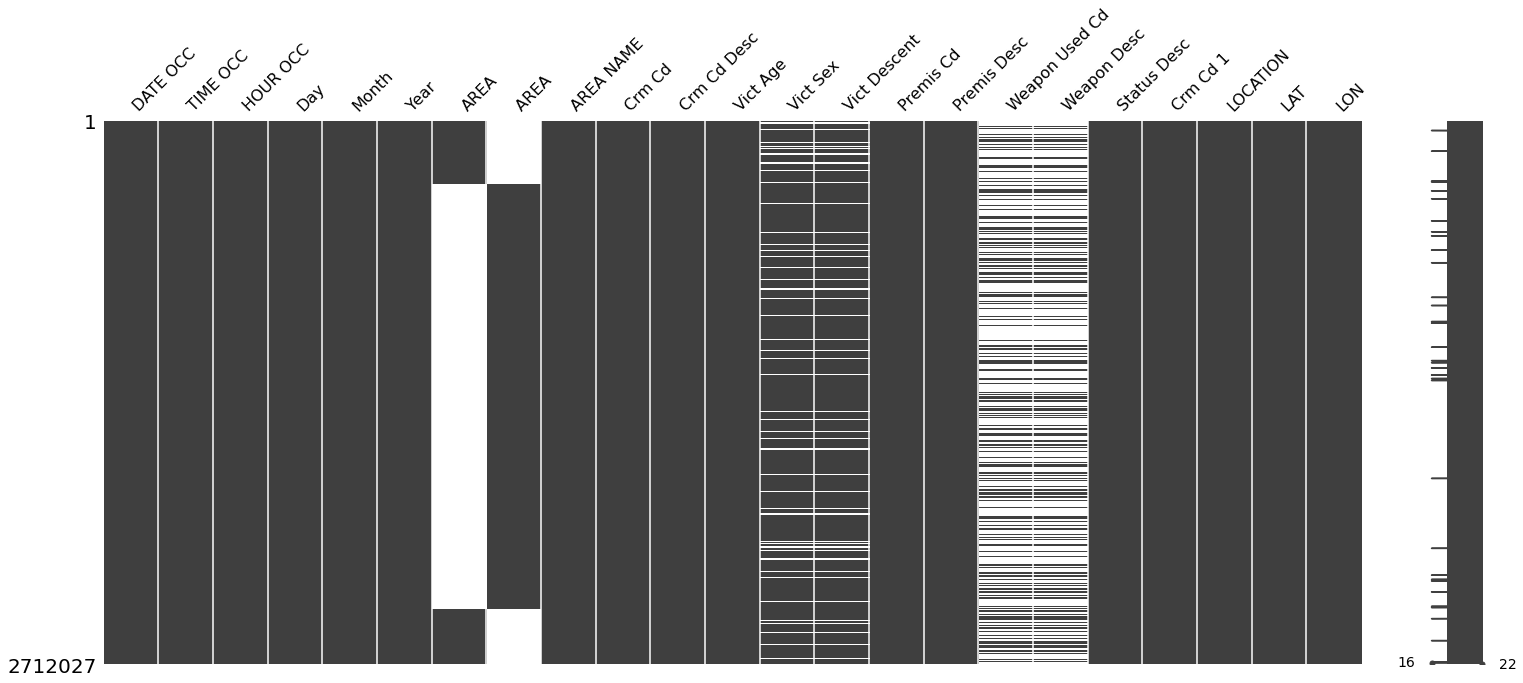

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
df['AREA'].update(df.pop('AREA '))

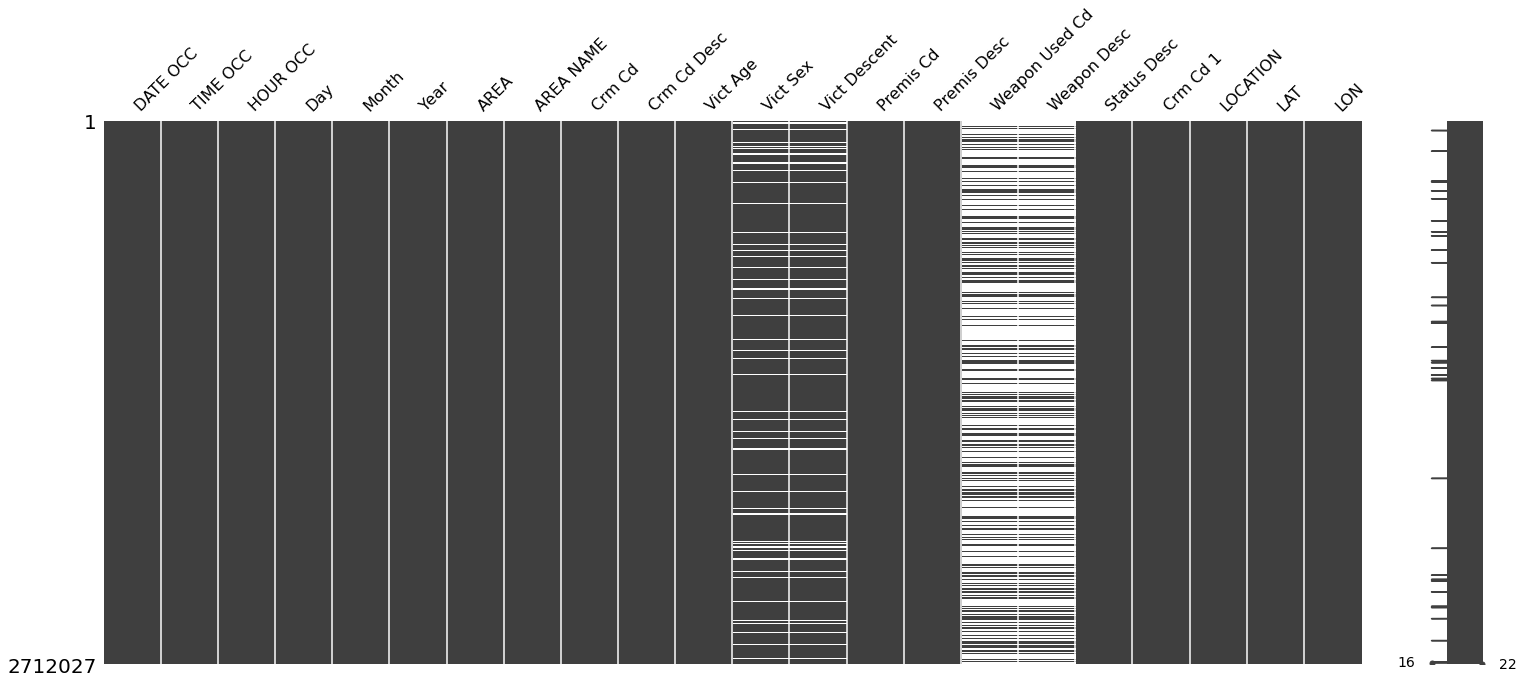

In [ ]:
msno.matrix(df)
plt.show()

In [ ]:
df.fillna('MISSING',inplace=True)

A world cloud telling which crimes are emore prevelant in LA

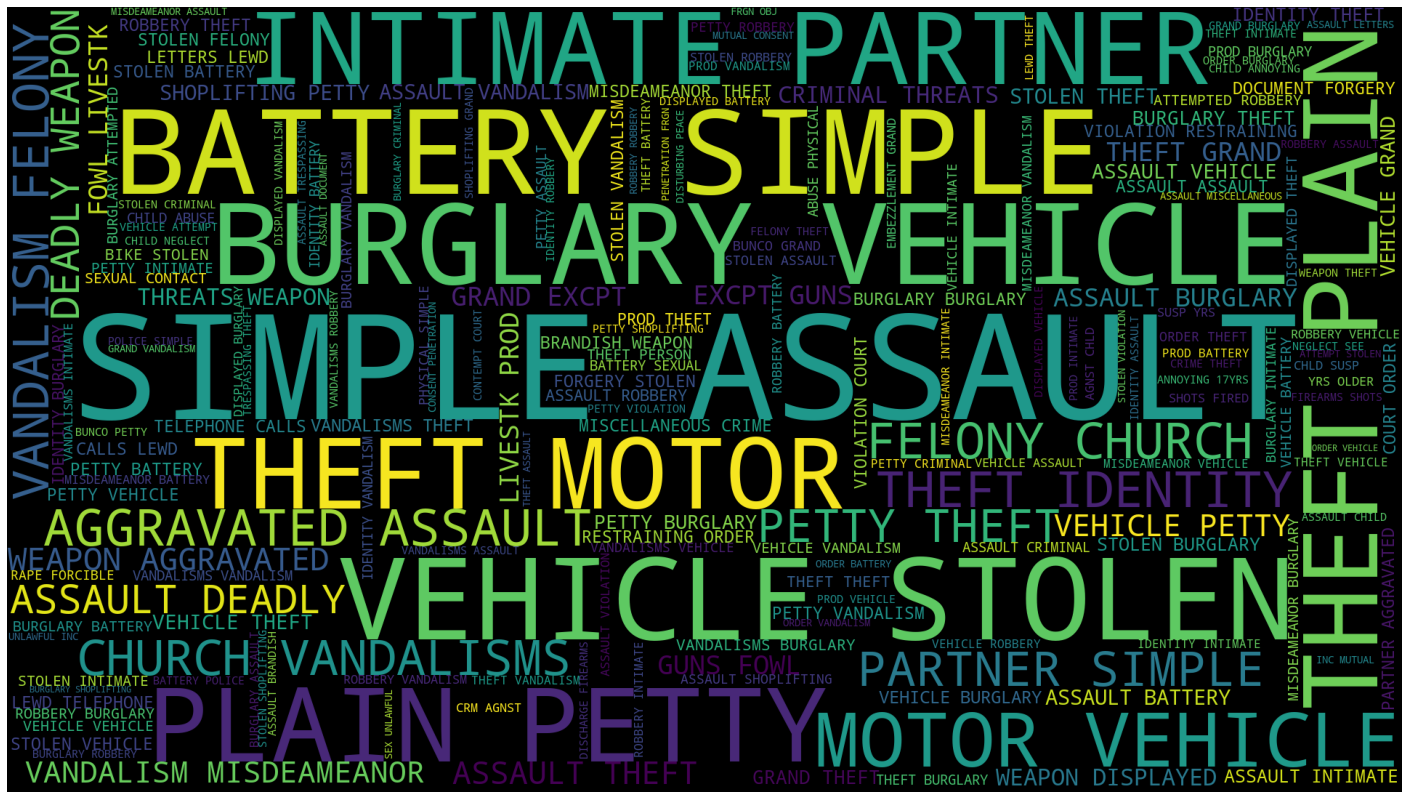

In [ ]:
plt.figure(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df['Crm Cd Desc']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

**A graph repsentation for visualizing which crime occurs most and at which hour of the day**

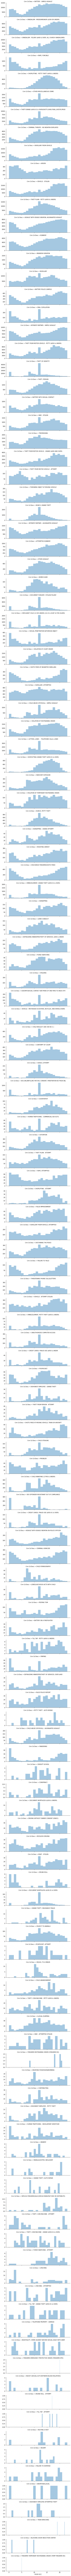

In [ ]:
g = sns.FacetGrid(df,row="Crm Cd Desc", size=1.9, aspect=4,sharex=True,sharey=False)
g.map(sns.distplot, "HOUR OCC", bins=24, kde=False, rug=False)

Visualizing which day of the week is most violent in LA

In [ ]:
labels = df['Day'].unique()
values=[]
for each in labels:
    values.append(len(df[df['Day']==each]))
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

Visualizing Crimes frequency

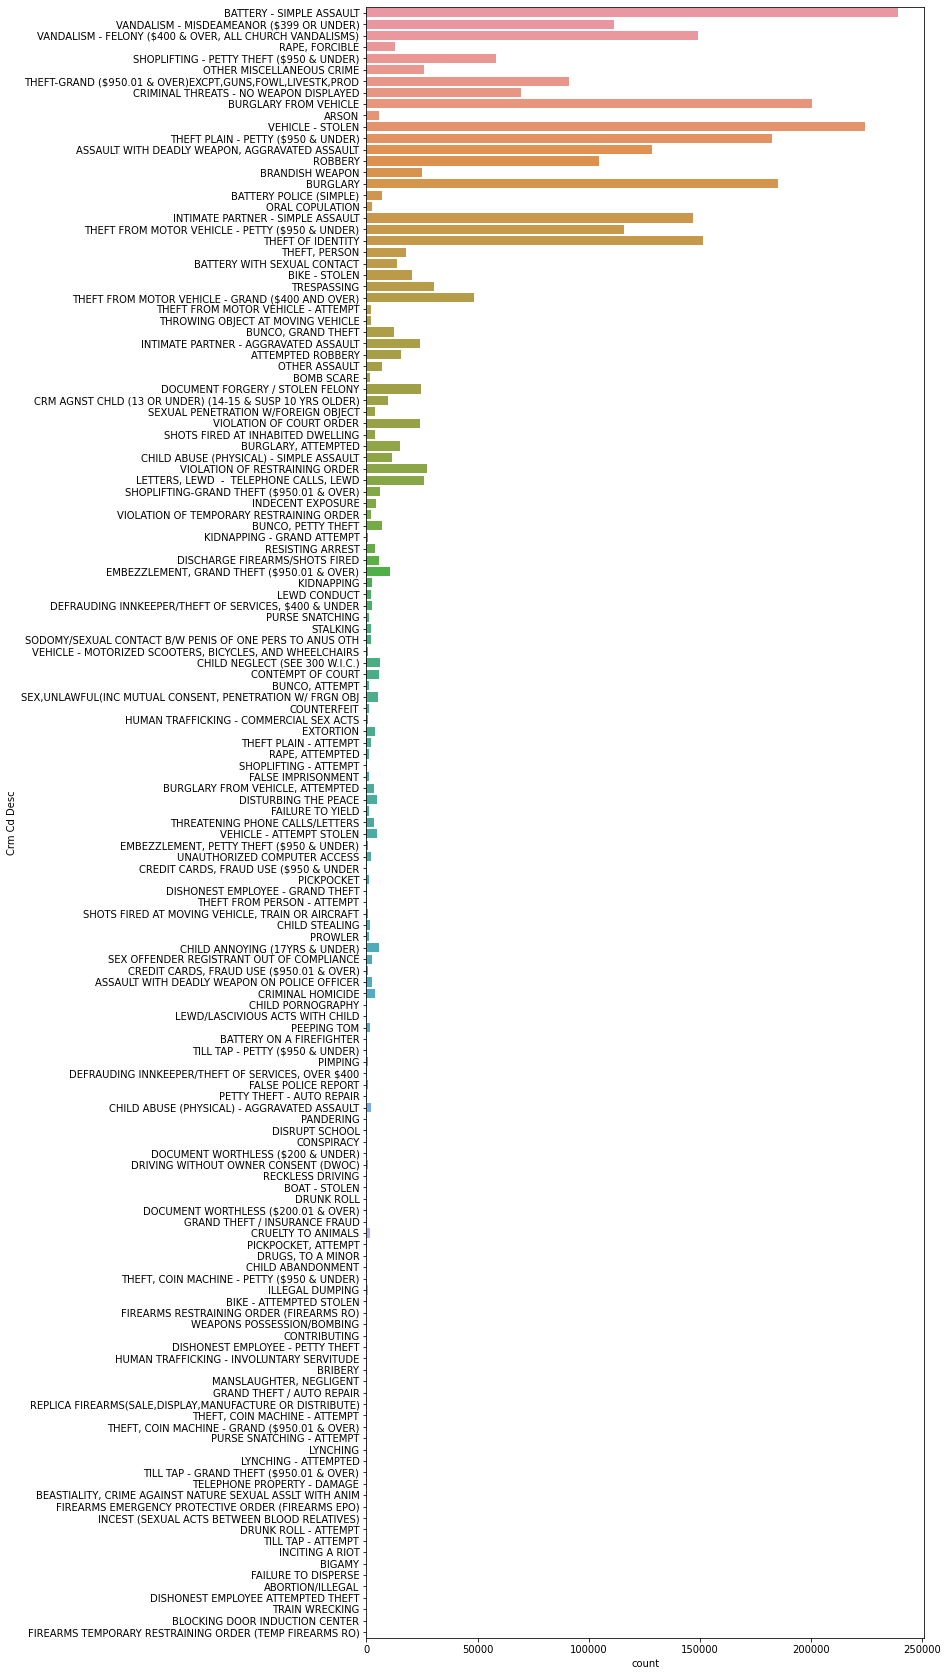

In [ ]:
plt.figure(figsize=(10,30))
count = sns.countplot(
    data = df, 
    y = 'Crm Cd Desc',
)
plt.show()

Visualizing Crimes month wise

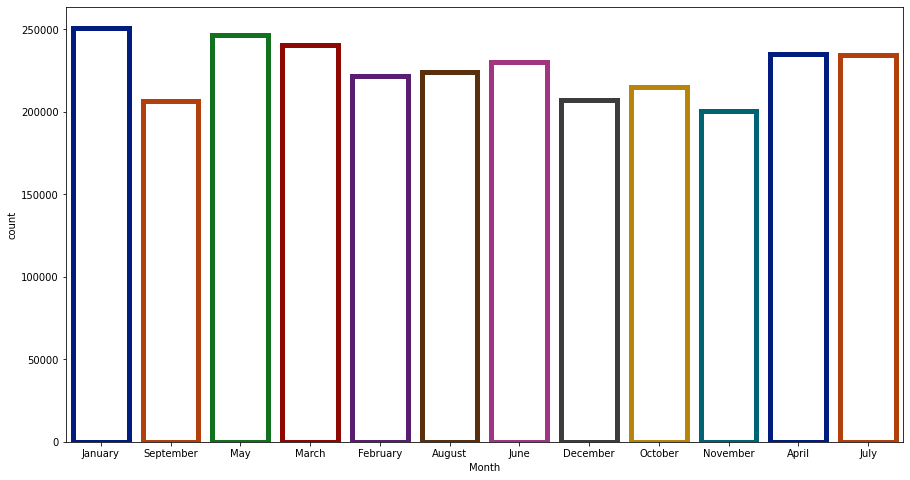

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Month", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

Visualizing Crimes Year wise

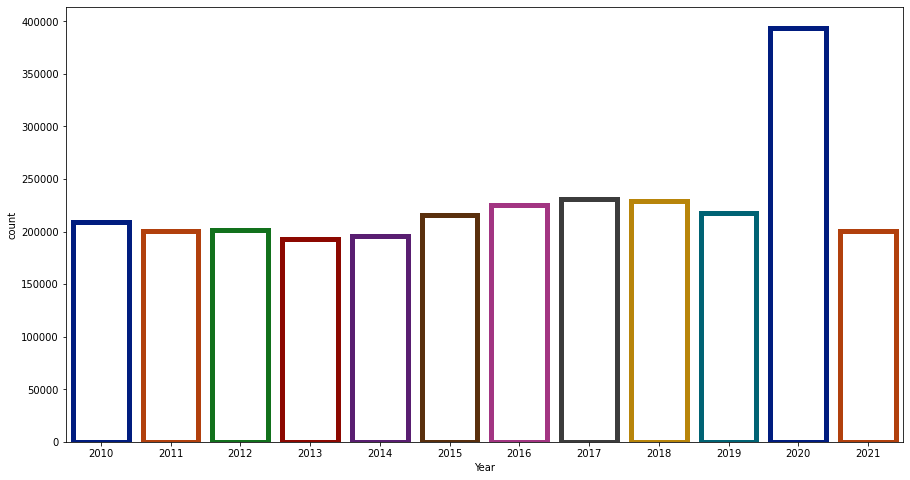

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Year", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

Visualizing time which are peak crime time

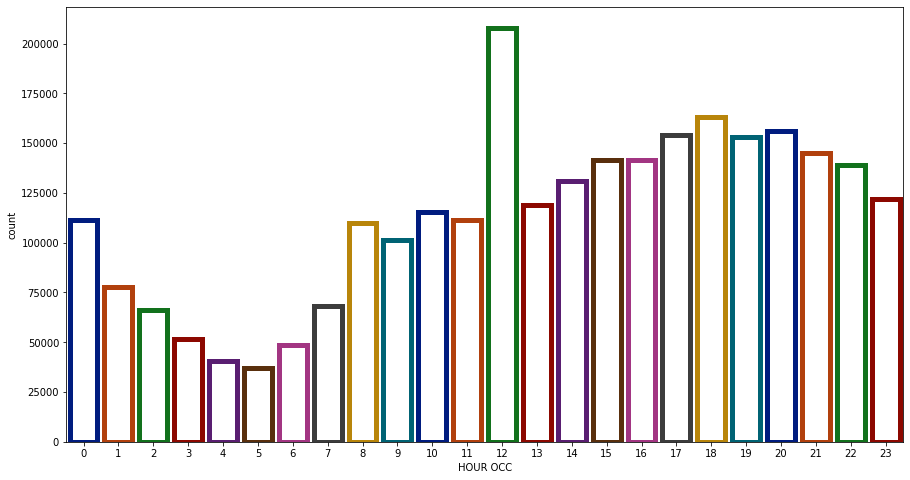

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="HOUR OCC", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

Visualizing which locality has most crimes 

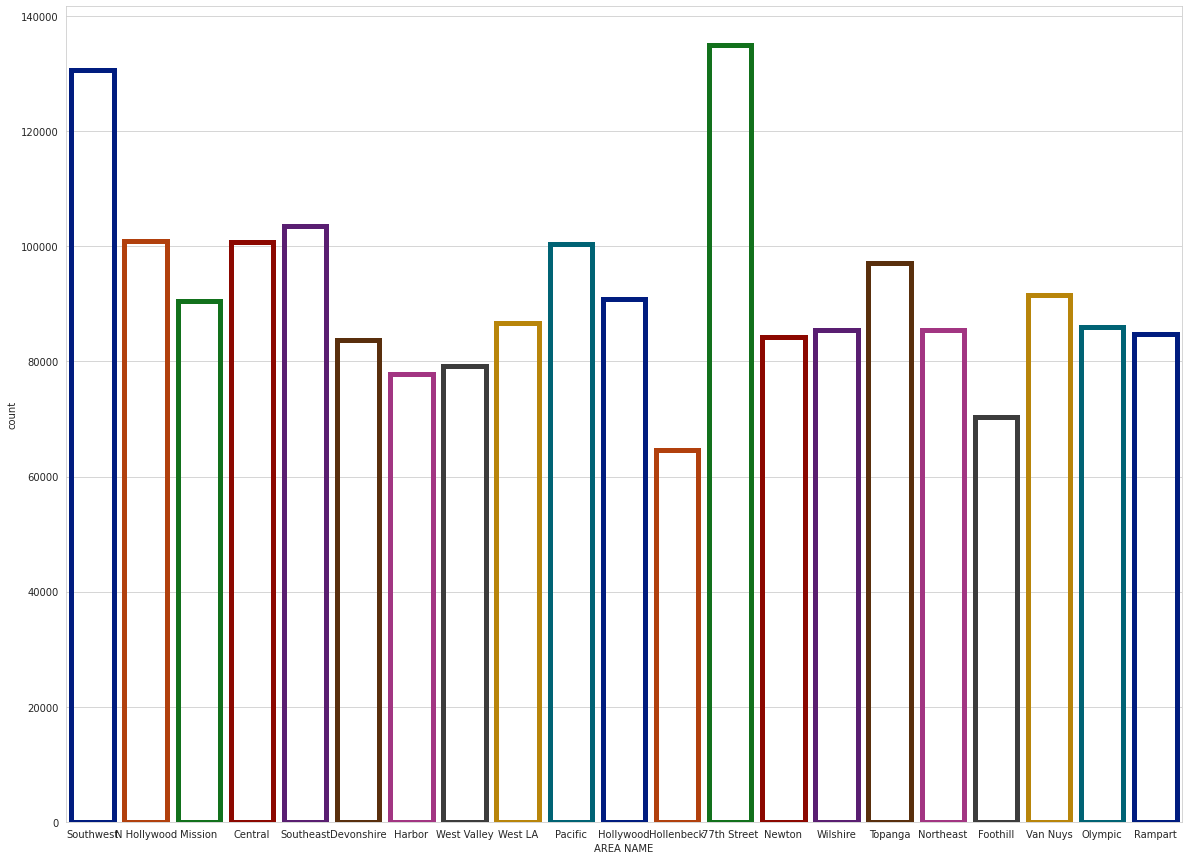

In [ ]:
plt.figure(figsize=(20,15))
ax = sns.countplot(x="AREA NAME", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

In [ ]:
df.drop(df[df['Vict Age'] < 1].index, axis=0, inplace=True)

Visualizing Victim Age wise

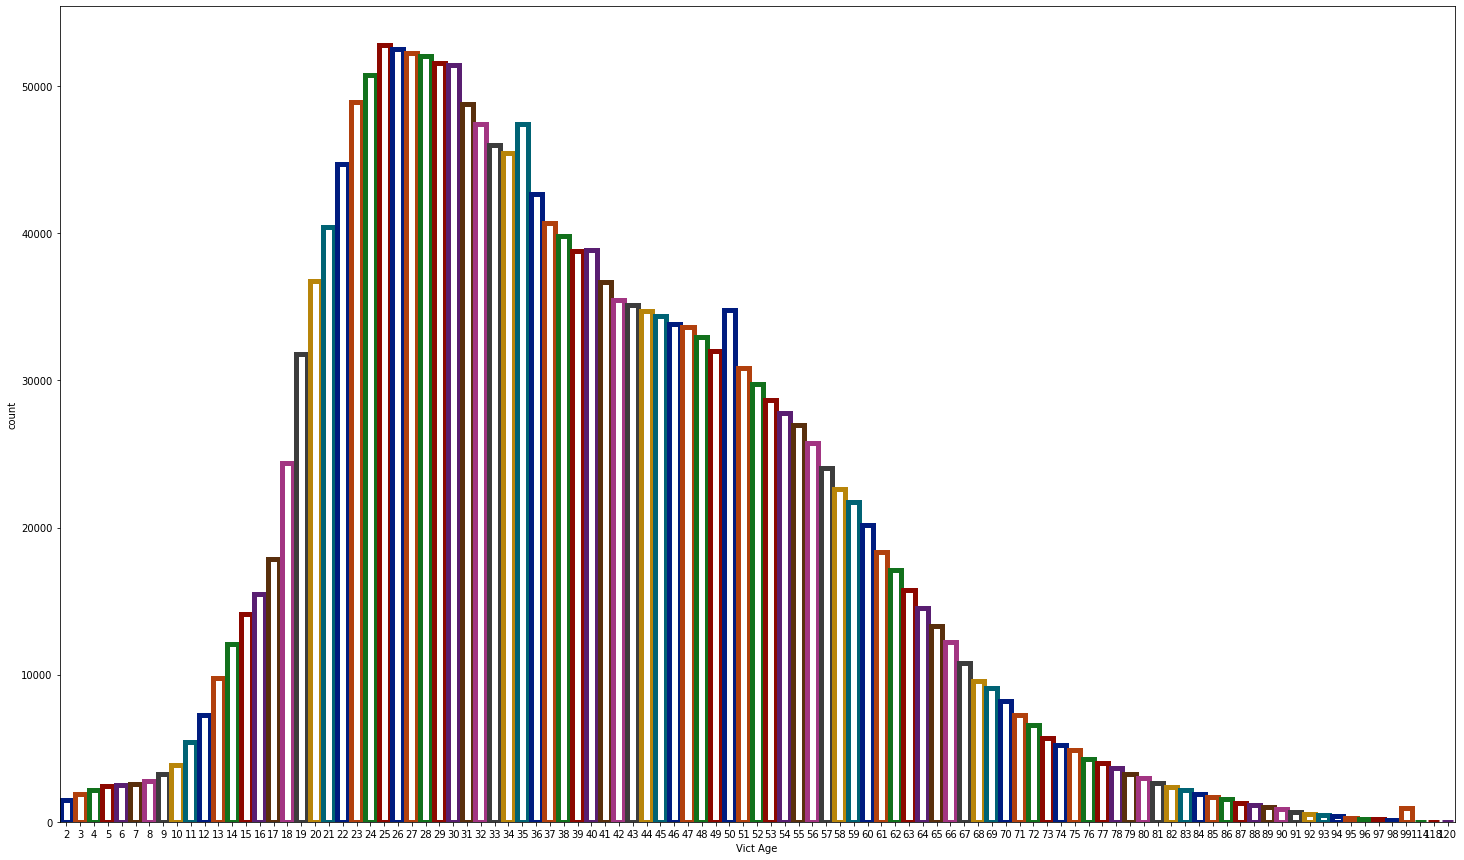

In [ ]:
plt.figure(figsize=(25,15))
ax = sns.countplot(x="Vict Age", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

Which ethnicity is more prone to be victims?

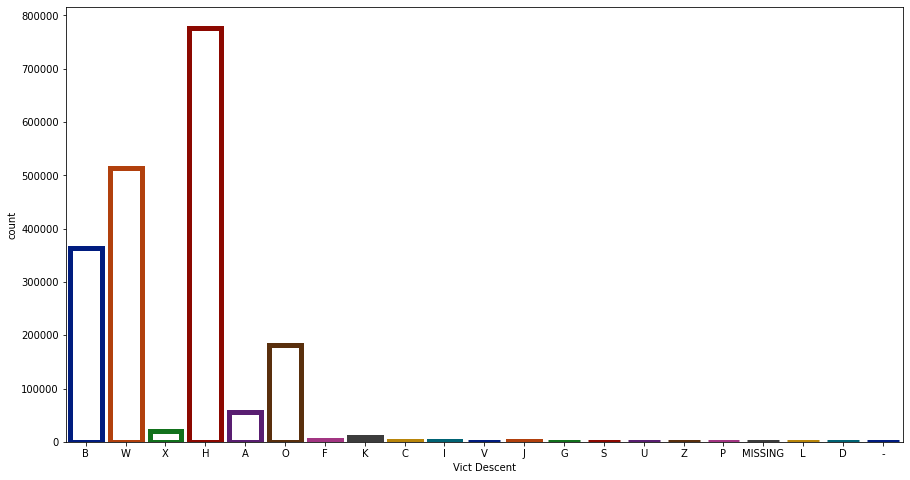

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Vict Descent", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

Pattern indication rise and fall of crime scene in LA

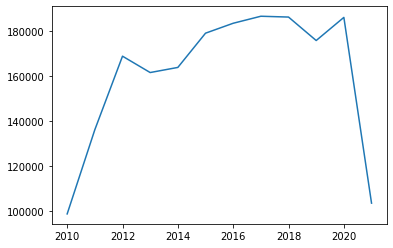

In [ ]:
crimeByYear = df['Year'].value_counts(sort=False).sort_index()
crimeByYear.plot(kind = 'line')

Crimes plot Year Wise

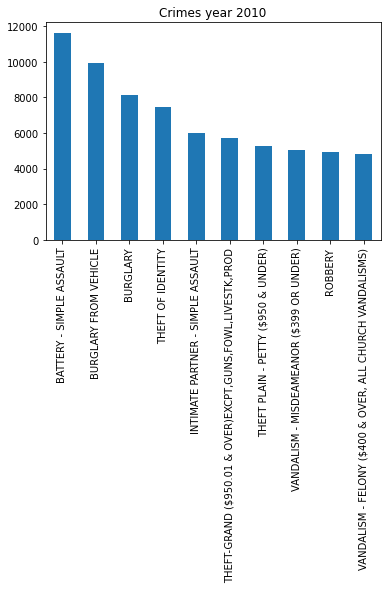

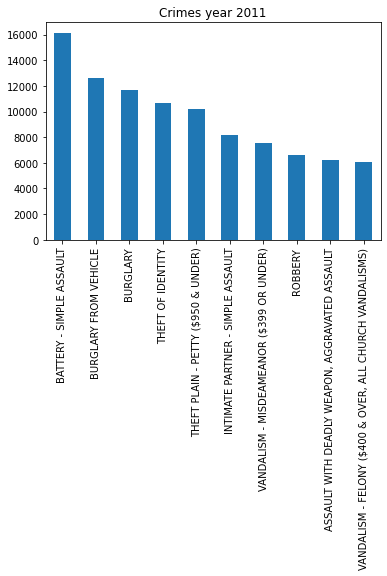

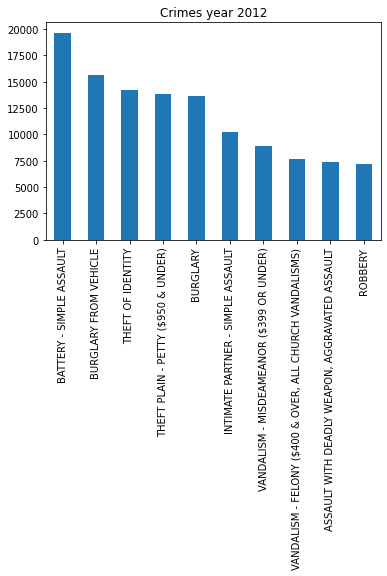

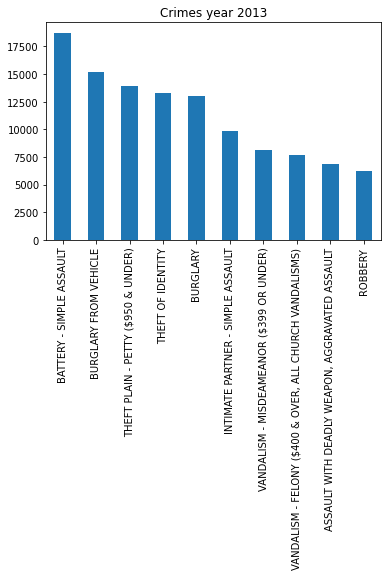

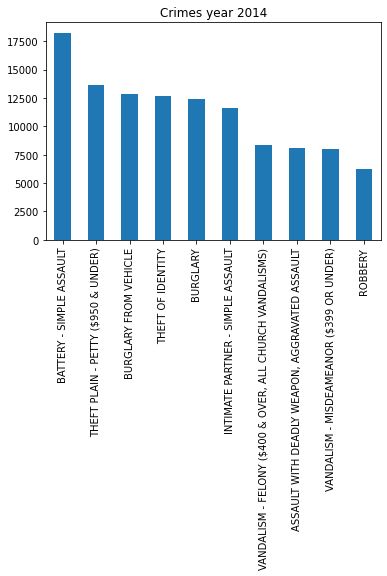

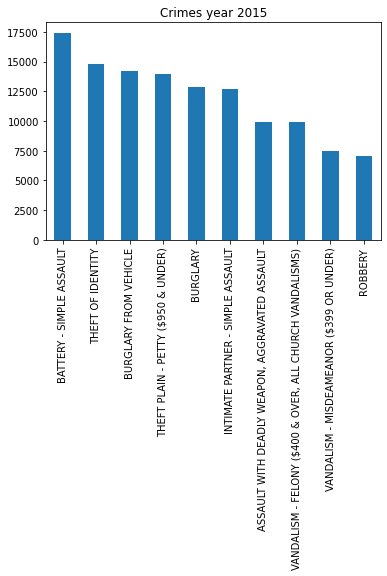

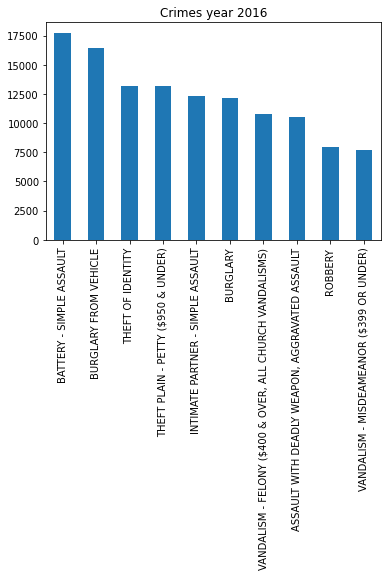

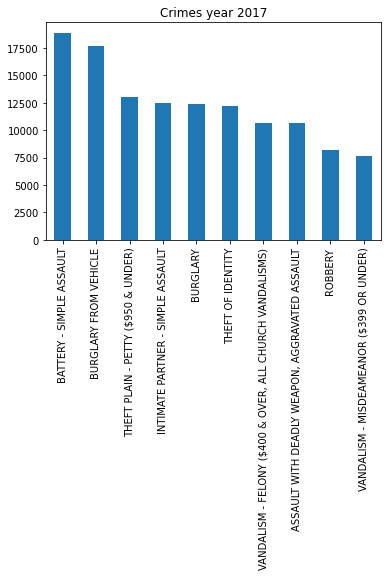

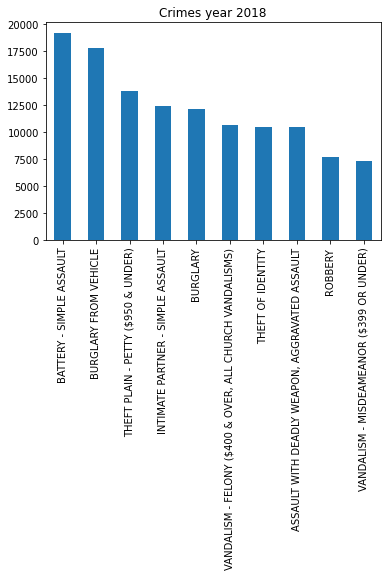

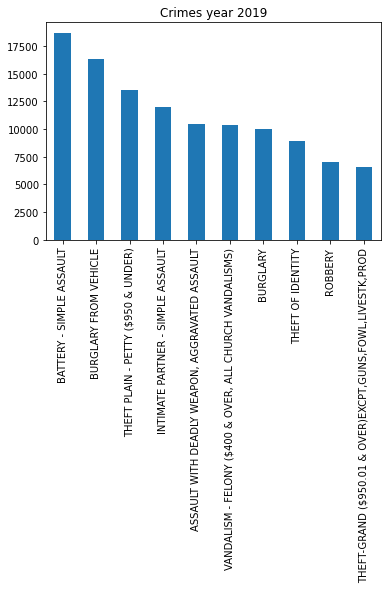

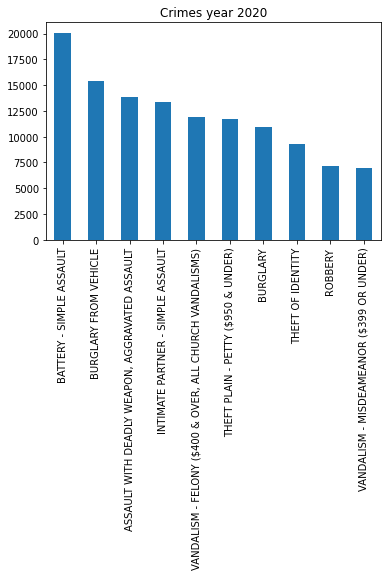

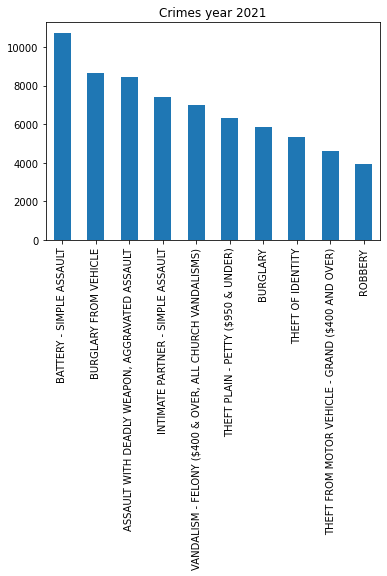

In [ ]:
for year in crimeByYear.keys():
    crimeYear = df[df['Year'] == year]['Crm Cd Desc'].value_counts()[:10]
    crimeYear = crimeYear.plot(kind = 'bar',title = "Crimes year " + str(year))
    plt.show()

Crimes Area Wise

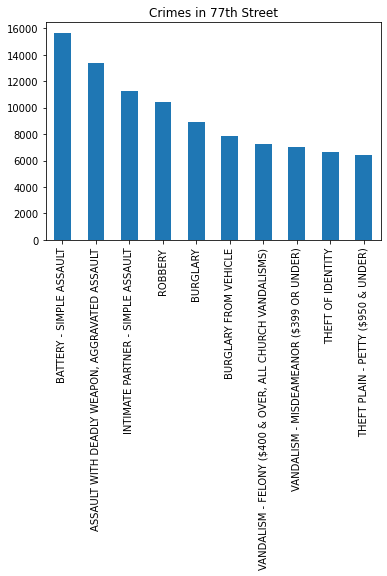

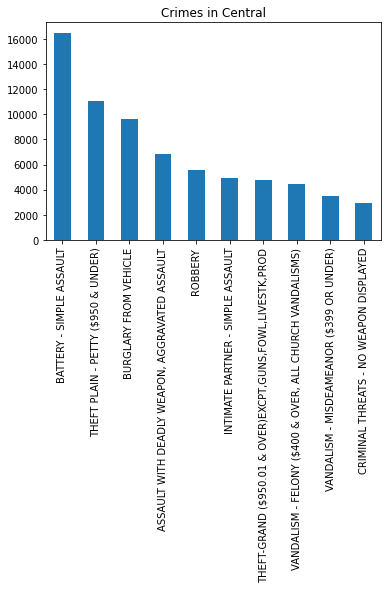

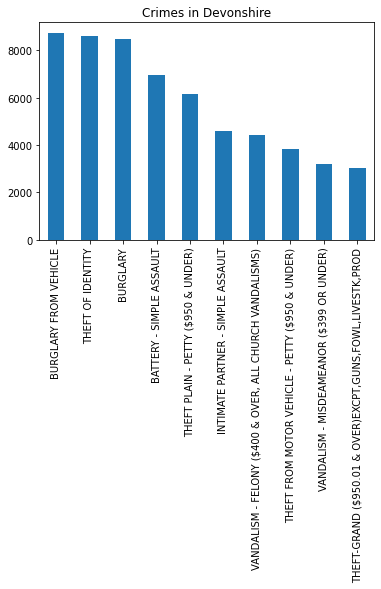

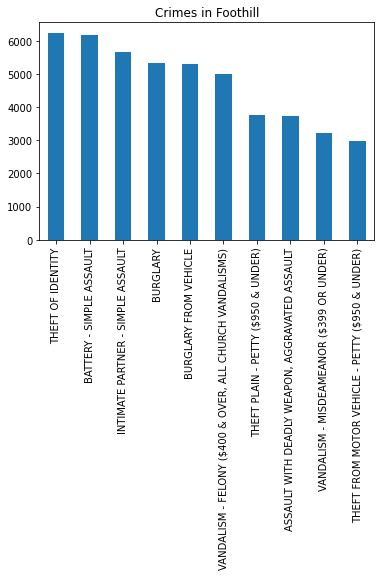

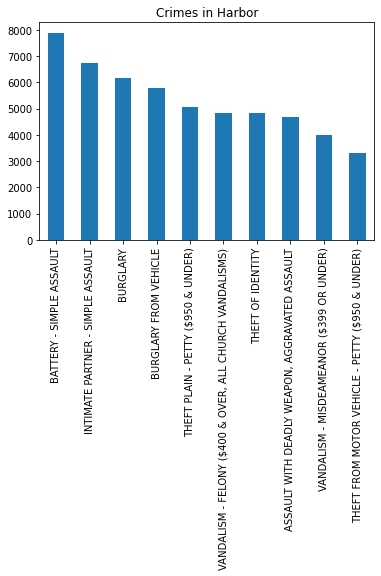

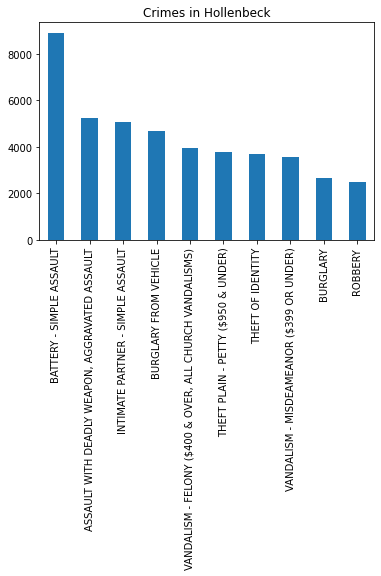

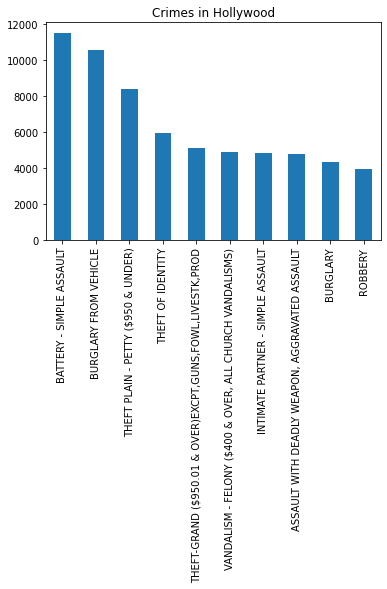

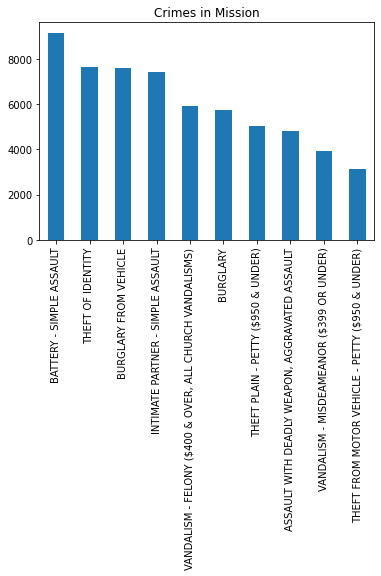

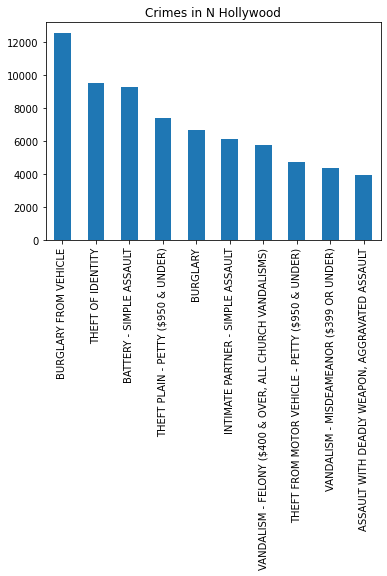

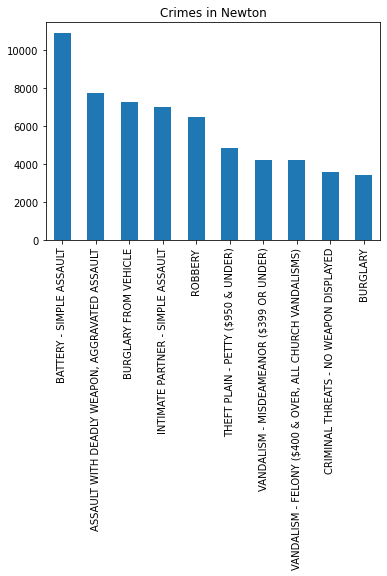

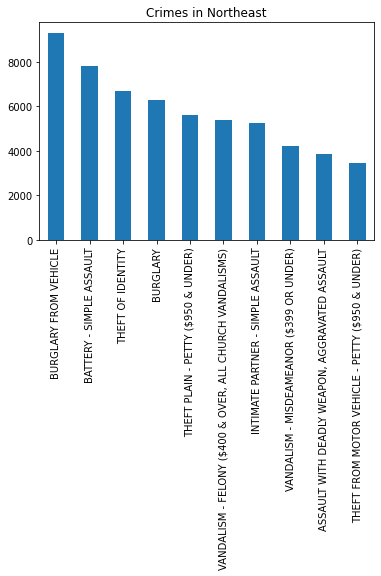

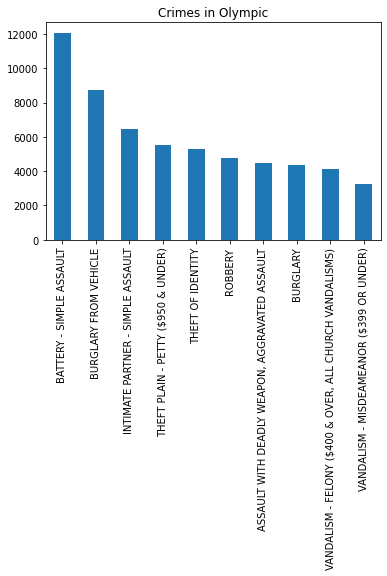

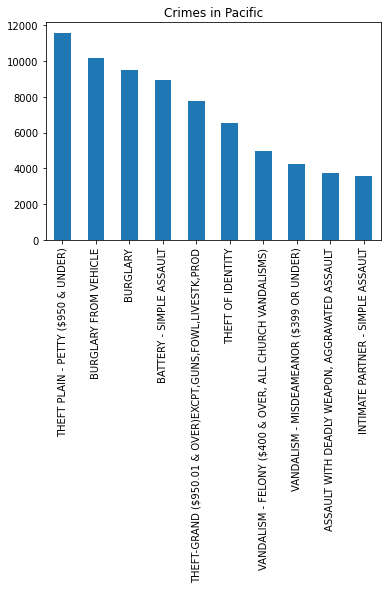

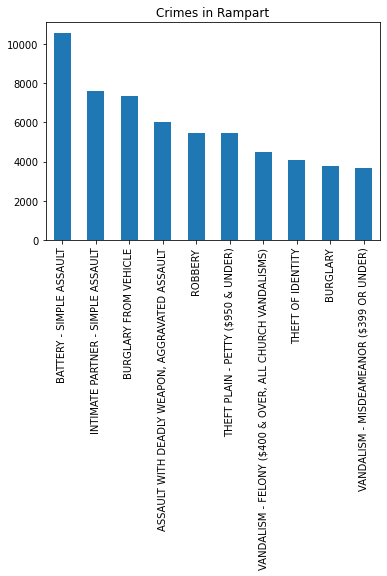

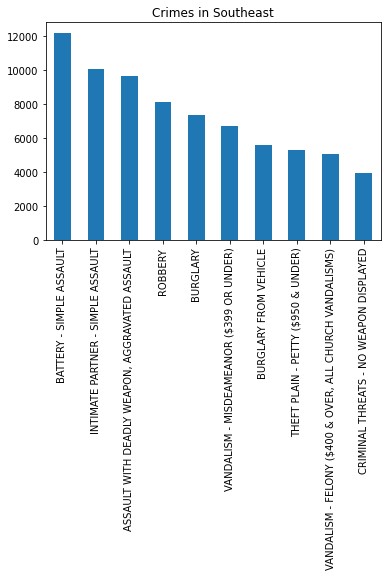

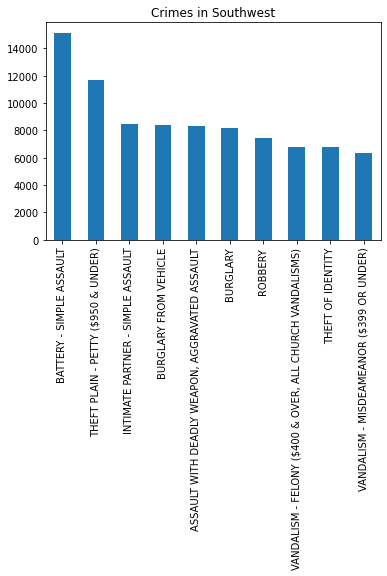

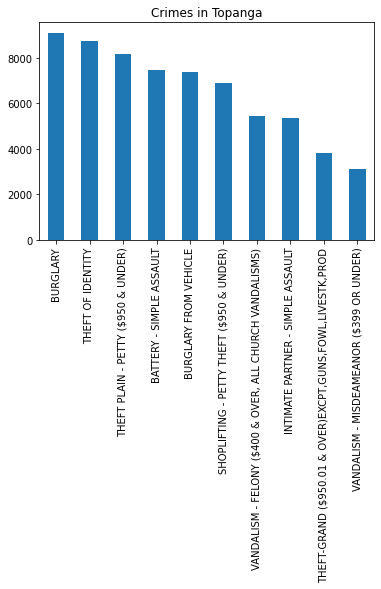

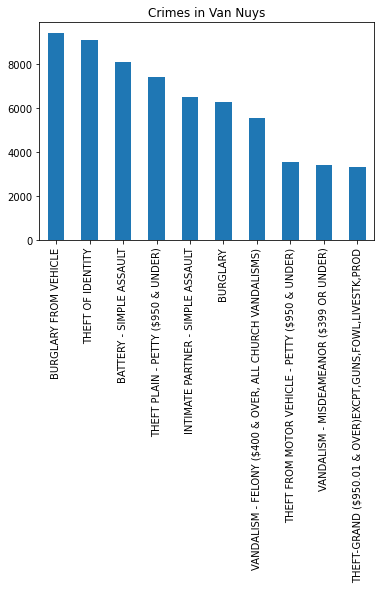

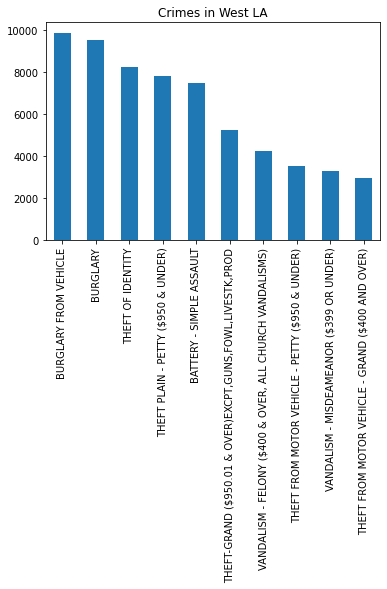

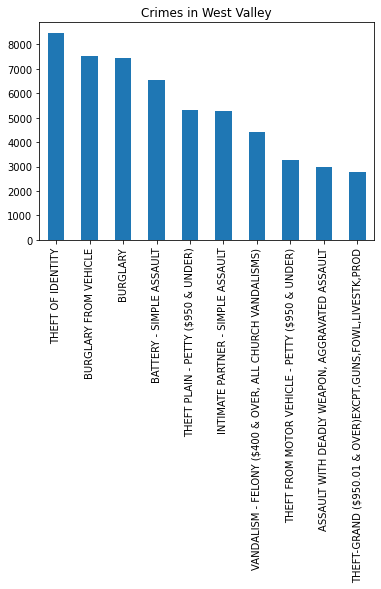

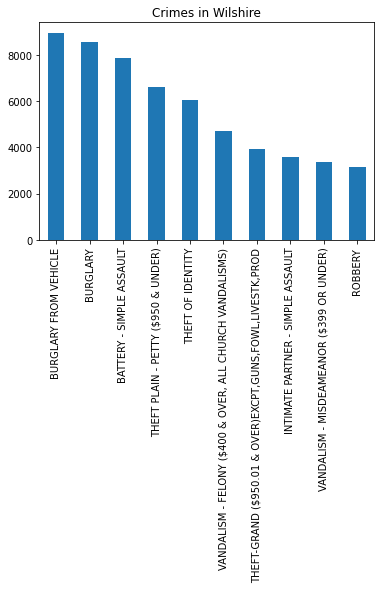

In [ ]:
crimeByArea = df['AREA NAME'].value_counts().sort_index()
crimeCommonType = {}
for area in crimeByArea.keys():
    crimeArea = df[df['AREA NAME'] == area]['Crm Cd Desc'].value_counts()[:10]
    for crType in crimeArea.keys():
        if not crType in crimeCommonType:
            crimeCommonType[crType] = [area]
        else:
            crimeCommonType[crType].append(area)
    crimeArea = crimeArea.plot(kind = 'bar',title = "Crimes in " + area)
    plt.show()

Status of Cases

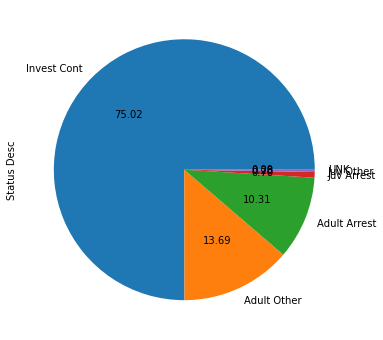

In [ ]:
df['Status Desc'].value_counts().plot(kind = 'pie',autopct='%.2f',figsize=(6,6))

In [ ]:
for status in df['Status Desc'].value_counts().keys():
    temp = df[df['Status Desc'] == status]['Crm Cd Desc'].value_counts()
    print("Most common crime with {} is {}".format(status,temp.keys()[0]))

Most common crime with Invest Cont is BURGLARY FROM VEHICLE
Most common crime with Adult Other is BATTERY - SIMPLE ASSAULT
Most common crime with Adult Arrest is INTIMATE PARTNER - SIMPLE ASSAULT
Most common crime with Juv Arrest is BATTERY - SIMPLE ASSAULT
Most common crime with Juv Other is BATTERY - SIMPLE ASSAULT
Most common crime with UNK is THEFT PLAIN - PETTY ($950 & UNDER)


Crime:Rape Stats

In [ ]:
rdf = df[df['Crm Cd Desc'].str.match('RAPE')]

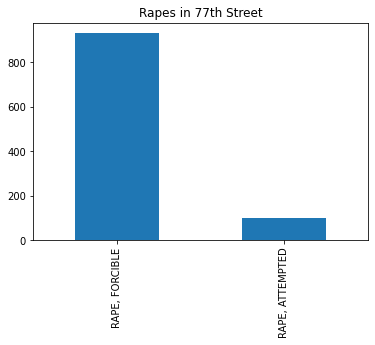

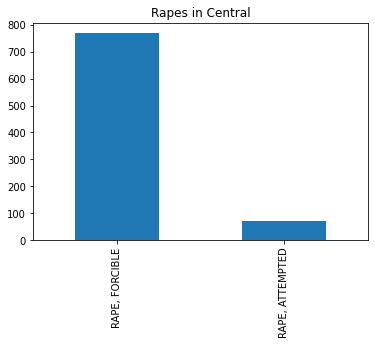

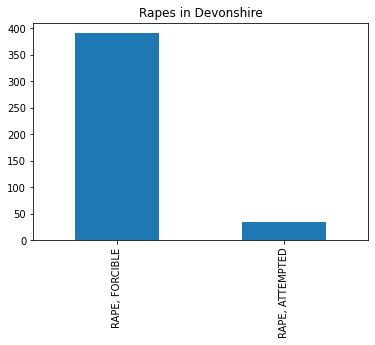

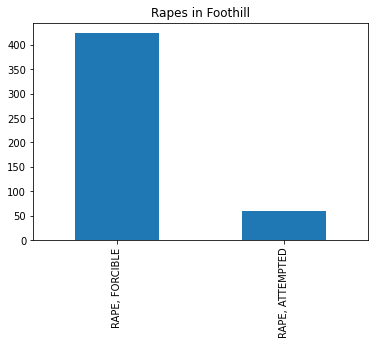

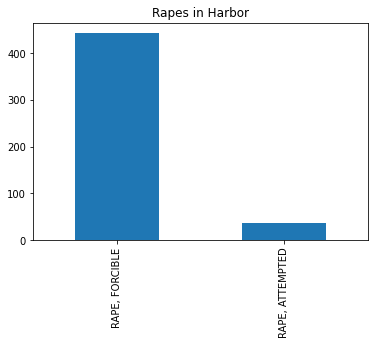

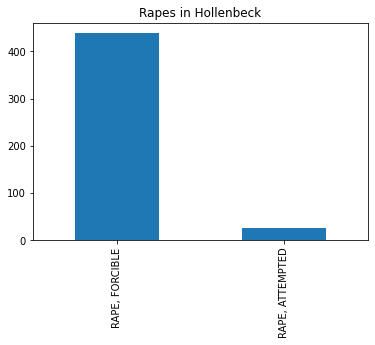

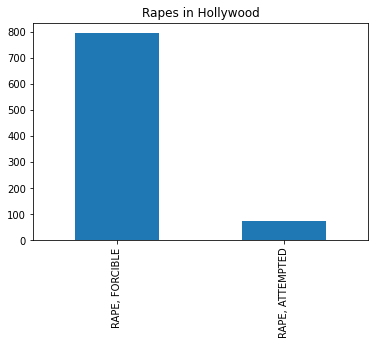

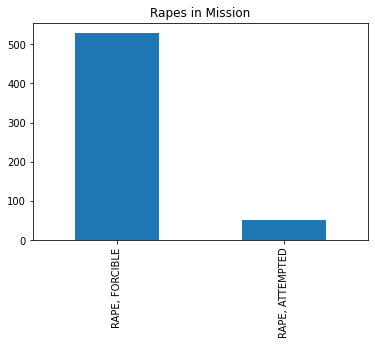

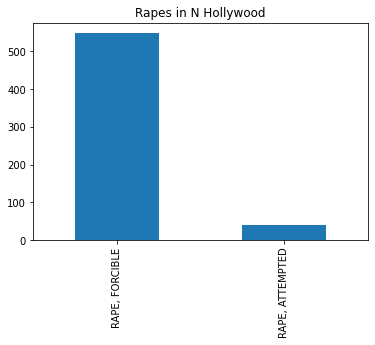

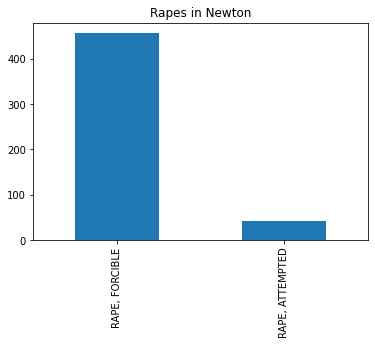

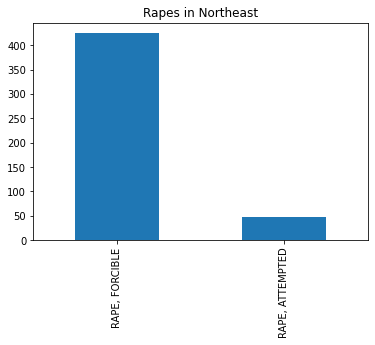

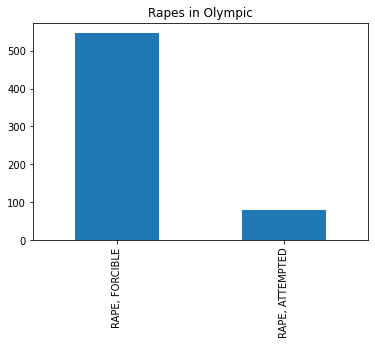

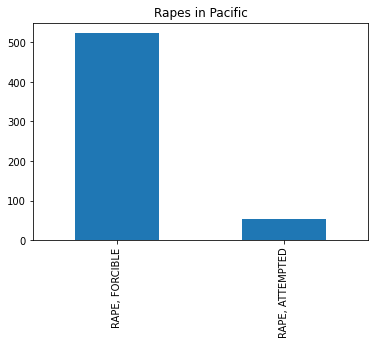

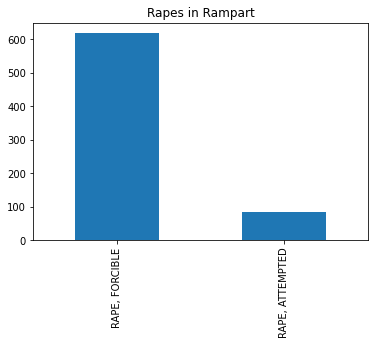

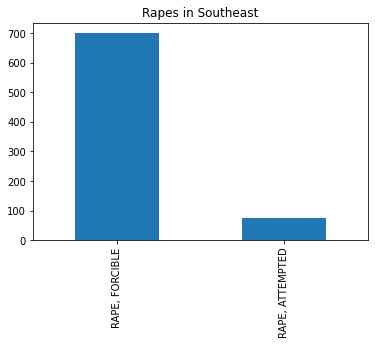

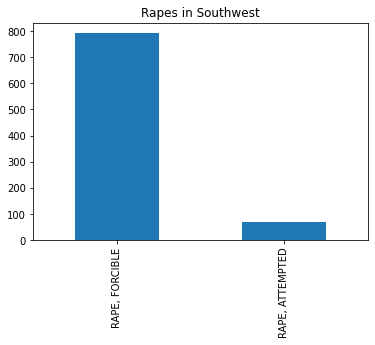

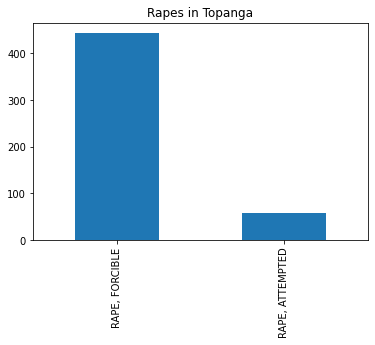

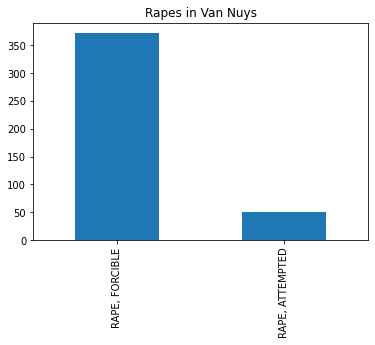

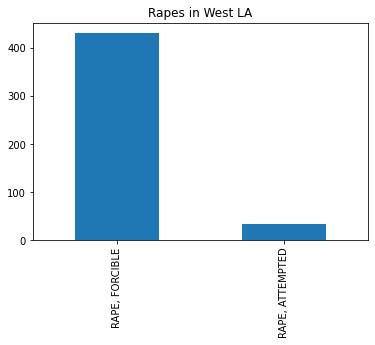

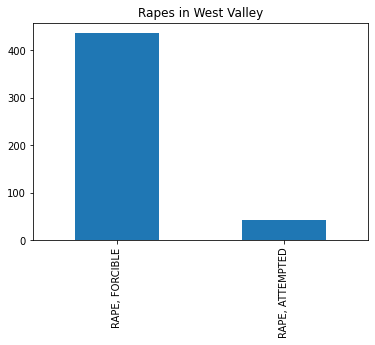

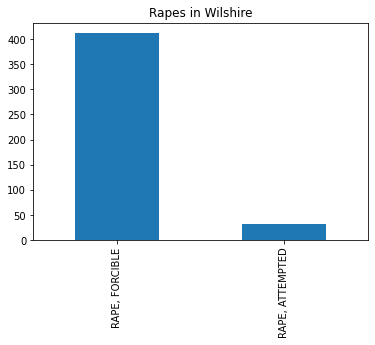

In [ ]:
crimeByArea = rdf['AREA NAME'].value_counts().sort_index()
crimeCommonType = {}
for area in crimeByArea.keys():
    crimeArea = rdf[rdf['AREA NAME'] == area]['Crm Cd Desc'].value_counts()[:10]
    for crType in crimeArea.keys():
        if not crType in crimeCommonType:
            crimeCommonType[crType] = [area]
        else:
            crimeCommonType[crType].append(area)
    crimeArea = crimeArea.plot(kind = 'bar',title = "Rapes in " + area)
    plt.show()

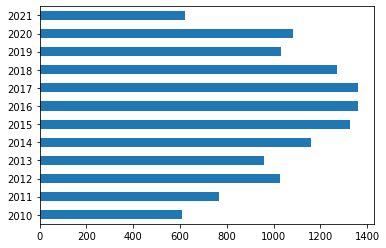

In [ ]:
crimeByYear = rdf['Year'].value_counts(sort=False).sort_index()
crimeByYear.plot(kind = 'barh')

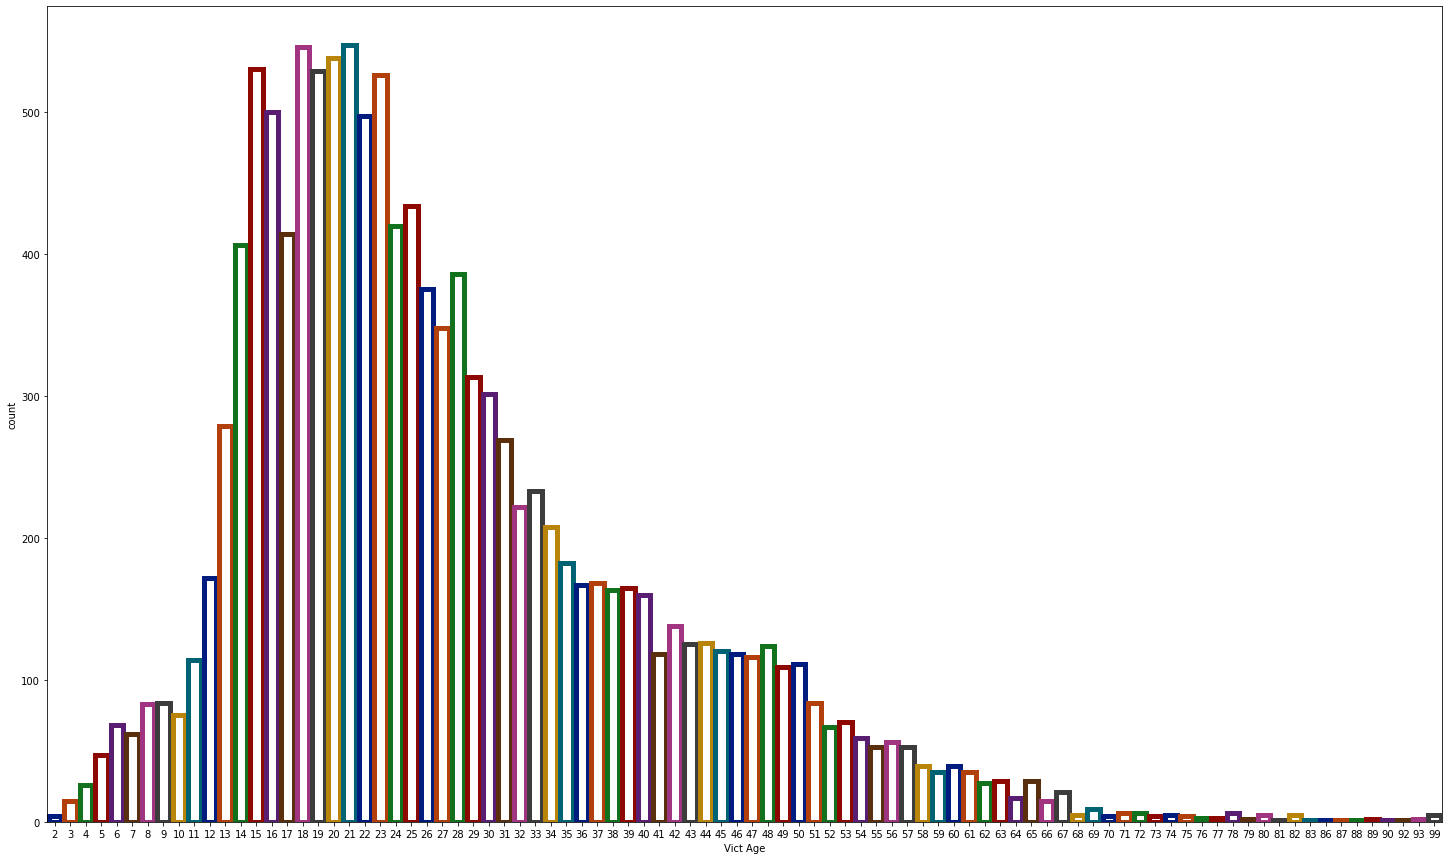

In [ ]:
plt.figure(figsize=(25,15))
ax = sns.countplot(x="Vict Age", data=rdf,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

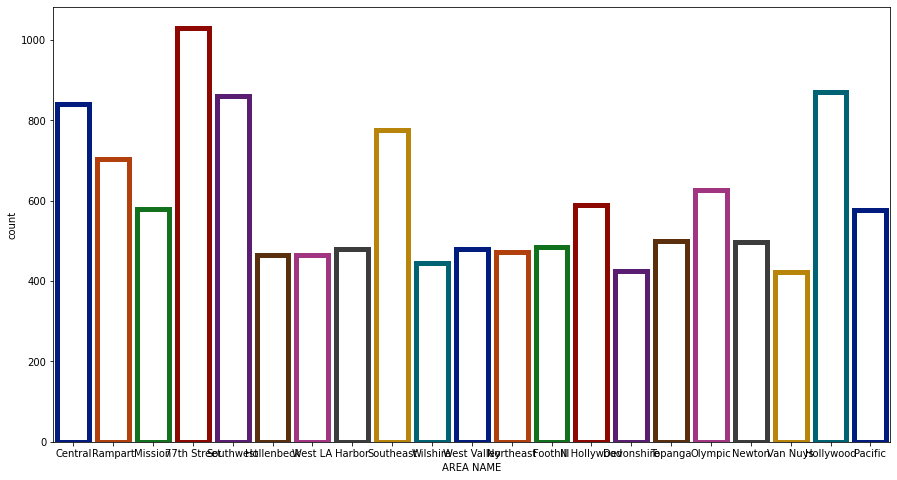

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="AREA NAME", data=rdf,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

77th Street is the most violent location crime wise, but when is the crime at peak for the day?

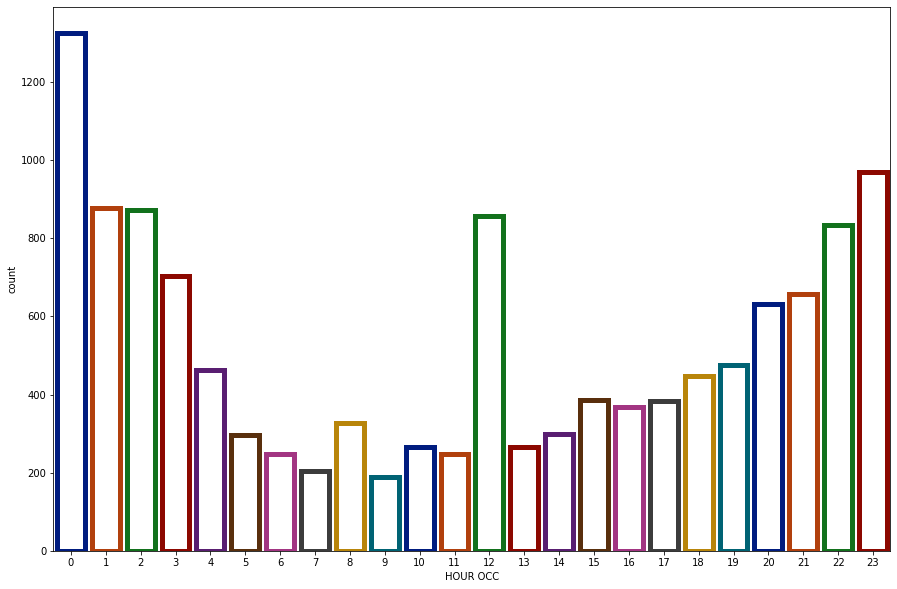

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="HOUR OCC", data=rdf,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

In [ ]:
Stdf = df[df['AREA NAME'].str.match('77th Street')]

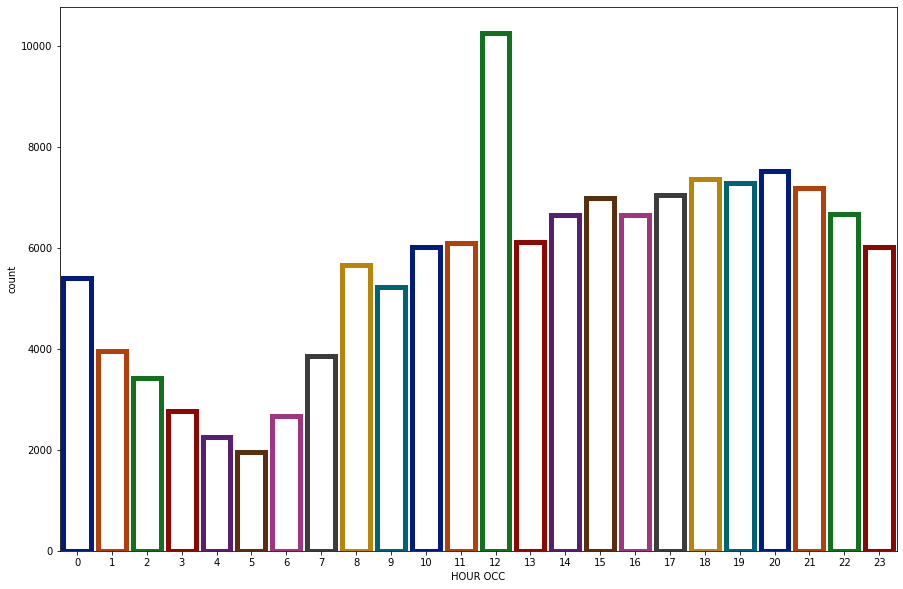

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="HOUR OCC", data=Stdf,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

Vehicle Related Crimes

In [ ]:
vdf = df[df['Crm Cd Desc'].str.match('VEHICLE')]

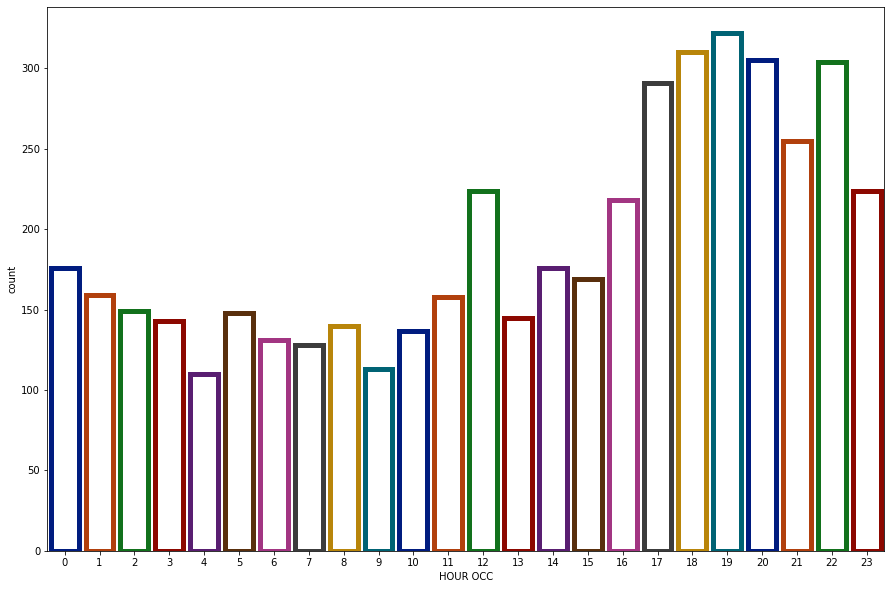

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="HOUR OCC", data=vdf,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

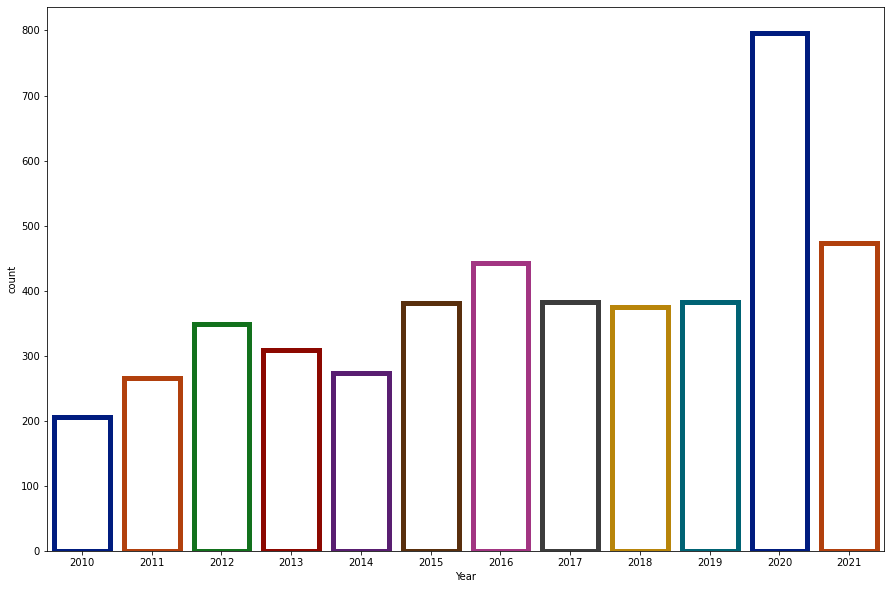

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Year", data=vdf,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

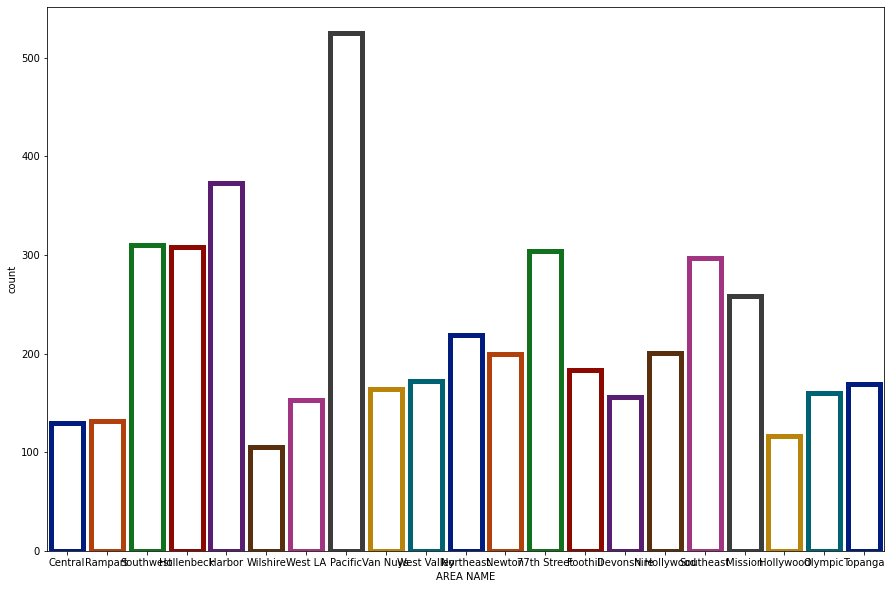

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="AREA NAME", data=vdf,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

In [ ]:
dfCOVID = pd.read_csv("/content/drive/MyDrive/DV 1/NYTimes COVID/Counties.csv")

In [ ]:
dfCOVID

date      county       state     fips  cases  deaths
0        2020-01-21   Snohomish  Washington  53061.0      1     0.0
1        2020-01-22   Snohomish  Washington  53061.0      1     0.0
2        2020-01-23   Snohomish  Washington  53061.0      1     0.0
3        2020-01-24        Cook    Illinois  17031.0      1     0.0
4        2020-01-24   Snohomish  Washington  53061.0      1     0.0
...             ...         ...         ...      ...    ...     ...
1816608  2021-10-14  Sweetwater     Wyoming  56037.0   7245    75.0
1816609  2021-10-14       Teton     Wyoming  56039.0   5039    13.0
1816610  2021-10-14       Uinta     Wyoming  56041.0   3705    26.0
1816611  2021-10-14    Washakie     Wyoming  56043.0   1574    29.0
1816612  2021-10-14      Weston     Wyoming  56045.0    978     8.0

[1816613 rows x 6 columns]

In [ ]:
LACovidDF = dfCOVID[dfCOVID['county'].str.match('Los Angeles')]

In [ ]:
LACovidDF

date       county       state    fips    cases   deaths
9        2020-01-26  Los Angeles  California  6037.0        1      0.0
14       2020-01-27  Los Angeles  California  6037.0        1      0.0
19       2020-01-28  Los Angeles  California  6037.0        1      0.0
24       2020-01-29  Los Angeles  California  6037.0        1      0.0
29       2020-01-30  Los Angeles  California  6037.0        1      0.0
...             ...          ...         ...     ...      ...      ...
1800572  2021-10-10  Los Angeles  California  6037.0  1471533  26312.0
1803821  2021-10-11  Los Angeles  California  6037.0  1472349  26338.0
1807072  2021-10-12  Los Angeles  California  6037.0  1473123  26346.0
1810321  2021-10-13  Los Angeles  California  6037.0  1474114  26362.0
1813570  2021-10-14  Los Angeles  California  6037.0  1475222  26379.0

[628 rows x 6 columns]

In [ ]:
LACovidDF['date'] = LACovidDF['date'].str.extract(r'(\d{4}-\d{2}-\d{2})') 
LACovidDF['date'] = pd.to_datetime(LACovidDF['date'], format='%Y-%m-%d')
LACovidDF['Day'] = LACovidDF['date'].dt.day_name()
LACovidDF['Month'] = LACovidDF['date'].dt.month_name()
LACovidDF['Year'] = LACovidDF['date'].dt.year

In [ ]:
LACovidDF

date       county       state  ...        Day    Month  Year
9       2020-01-26  Los Angeles  California  ...     Sunday  January  2020
14      2020-01-27  Los Angeles  California  ...     Monday  January  2020
19      2020-01-28  Los Angeles  California  ...    Tuesday  January  2020
24      2020-01-29  Los Angeles  California  ...  Wednesday  January  2020
29      2020-01-30  Los Angeles  California  ...   Thursday  January  2020
...            ...          ...         ...  ...        ...      ...   ...
1800572 2021-10-10  Los Angeles  California  ...     Sunday  October  2021
1803821 2021-10-11  Los Angeles  California  ...     Monday  October  2021
1807072 2021-10-12  Los Angeles  California  ...    Tuesday  October  2021
1810321 2021-10-13  Los Angeles  California  ...  Wednesday  October  2021
1813570 2021-10-14  Los Angeles  California  ...   Thursday  October  2021

[628 rows x 9 columns]

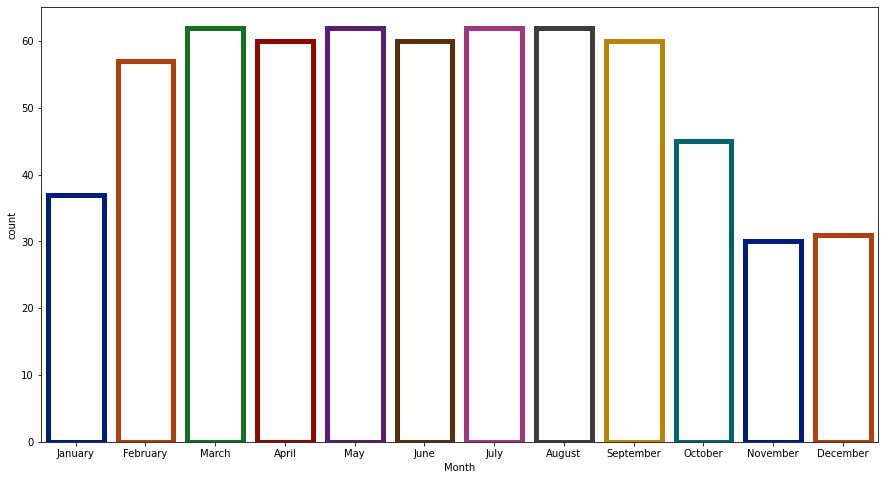

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Month", data=LACovidDF,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

In [ ]:
Crime2020 = df.loc[df['Year']>=2020]

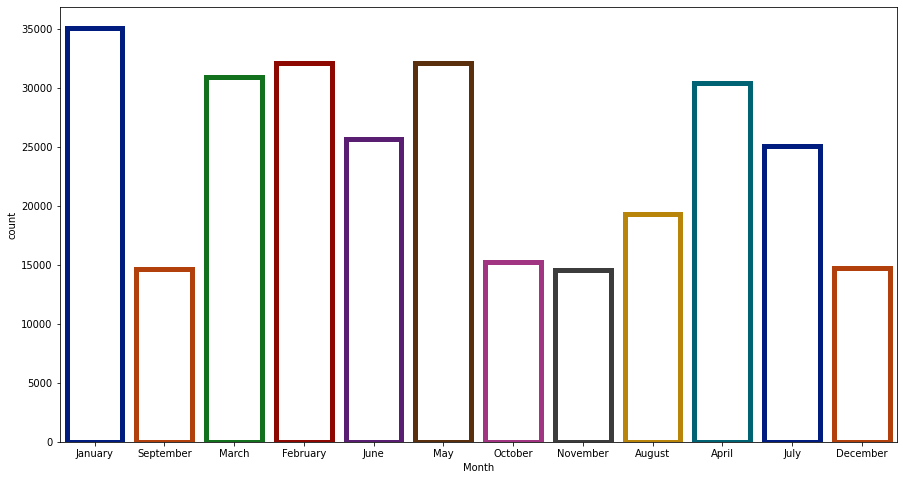

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Month", data=Crime2020,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

In [ ]:
LAPDCalls2010 = pd.read_csv("/content/drive/MyDrive/DV 1/LAPD calls/lapd-calls-for-service-2010.csv")

In [ ]:
LAPDCalls2011 = pd.read_csv("/content/drive/MyDrive/DV 1/LAPD calls/lapd-calls-for-service-2011.csv")
LAPDCalls2012 = pd.read_csv("/content/drive/MyDrive/DV 1/LAPD calls/lapd-calls-for-service-2012.csv")
LAPDCalls2013 = pd.read_csv("/content/drive/MyDrive/DV 1/LAPD calls/lapd-calls-for-service-2013.csv")
LAPDCalls2014 = pd.read_csv("/content/drive/MyDrive/DV 1/LAPD calls/lapd-calls-for-service-2014.csv")
LAPDCalls2015 = pd.read_csv("/content/drive/MyDrive/DV 1/LAPD calls/lapd-calls-for-service-2015.csv")
LAPDCalls2016 = pd.read_csv("/content/drive/MyDrive/DV 1/LAPD calls/lapd-calls-for-service-2016.csv")
LAPDCalls2017 = pd.read_csv("/content/drive/MyDrive/DV 1/LAPD calls/lapd-calls-for-service-2017.csv")
LAPDCalls2018 = pd.read_csv("/content/drive/MyDrive/DV 1/LAPD calls/lapd-calls-for-service-2018.csv")

In [ ]:
pdList = [LAPDCalls2010,LAPDCalls2011,LAPDCalls2012,LAPDCalls2013,LAPDCalls2014,LAPDCalls2015,LAPDCalls2016,LAPDCalls2017,LAPDCalls2018]
LAPDCalls = pd.concat(pdList)

In [ ]:
LAPDCalls.columns

Index(['Incident Number', 'Reporting District', 'Area Occurred',
       'Dispatch Date', 'Dispatch Time', 'Call Type Code',
       'Call Type Description', 'Incident_Number', 'Area_Occ', 'Rpt_Dist',
       'Dispatch_Date', 'Dispatch_Time', 'Call_Type_Code', 'Call_Type_Text'],
      dtype='object')

In [ ]:
LAPDCalls.head()

Incident Number  Reporting District  ... Call_Type_Code Call_Type_Text
0     1.012310e+11               202.0  ...            NaN            NaN
1     1.012310e+11              1115.0  ...            NaN            NaN
2     1.012310e+11              1664.0  ...            NaN            NaN
3     1.012310e+11               308.0  ...            NaN            NaN
4     1.012310e+11               526.0  ...            NaN            NaN

[5 rows x 14 columns]

In [ ]:
LAPDCalls['Area Occurred'].value_counts()

77th Street    492196
Southwest      447691
Hollywood      410283
Mission        397711
N Hollywood    394615
Pacific        392723
Southeast      369389
Van Nuys       366344
Northeast      357523
Olympic        351790
Wilshire       351440
Newton         351216
Rampart        345172
West Valley    332546
Foothill       328511
West LA        327766
Harbor         325248
Topanga        324409
Devonshire     316515
Central        315503
Hollenbeck     298508
Name: Area Occurred, dtype: int64

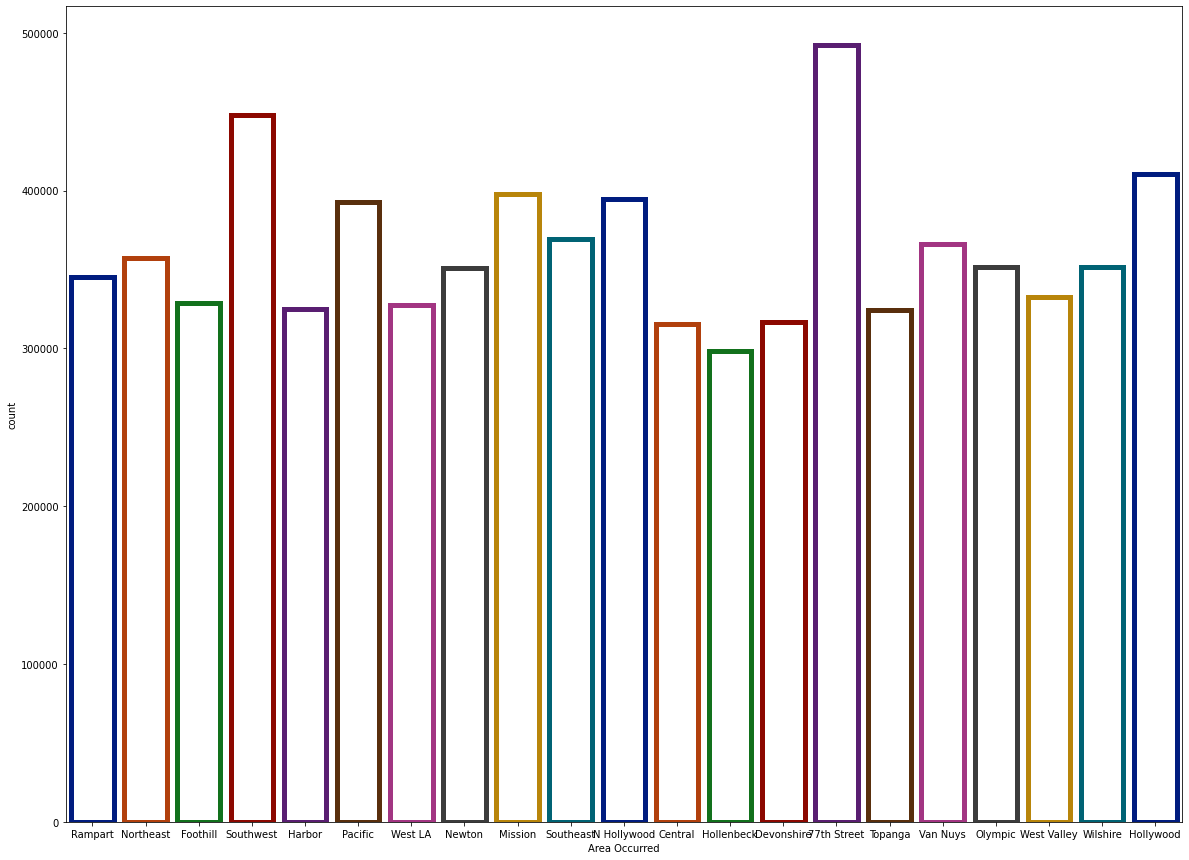

In [ ]:
plt.figure(figsize=(20,15))
ax = sns.countplot(x="Area Occurred", data=LAPDCalls,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

In [ ]:
df['AREA NAME'].value_counts()

77th Street    134961
Southwest      130646
Southeast      103508
N Hollywood    100911
Central        100816
Pacific        100391
Topanga         97200
Van Nuys        91606
Hollywood       90892
Mission         90495
West LA         86773
Olympic         85938
Northeast       85465
Wilshire        85410
Rampart         84767
Newton          84217
Devonshire      83678
West Valley     79192
Harbor          77872
Foothill        70416
Hollenbeck      64601
Name: AREA NAME, dtype: int64

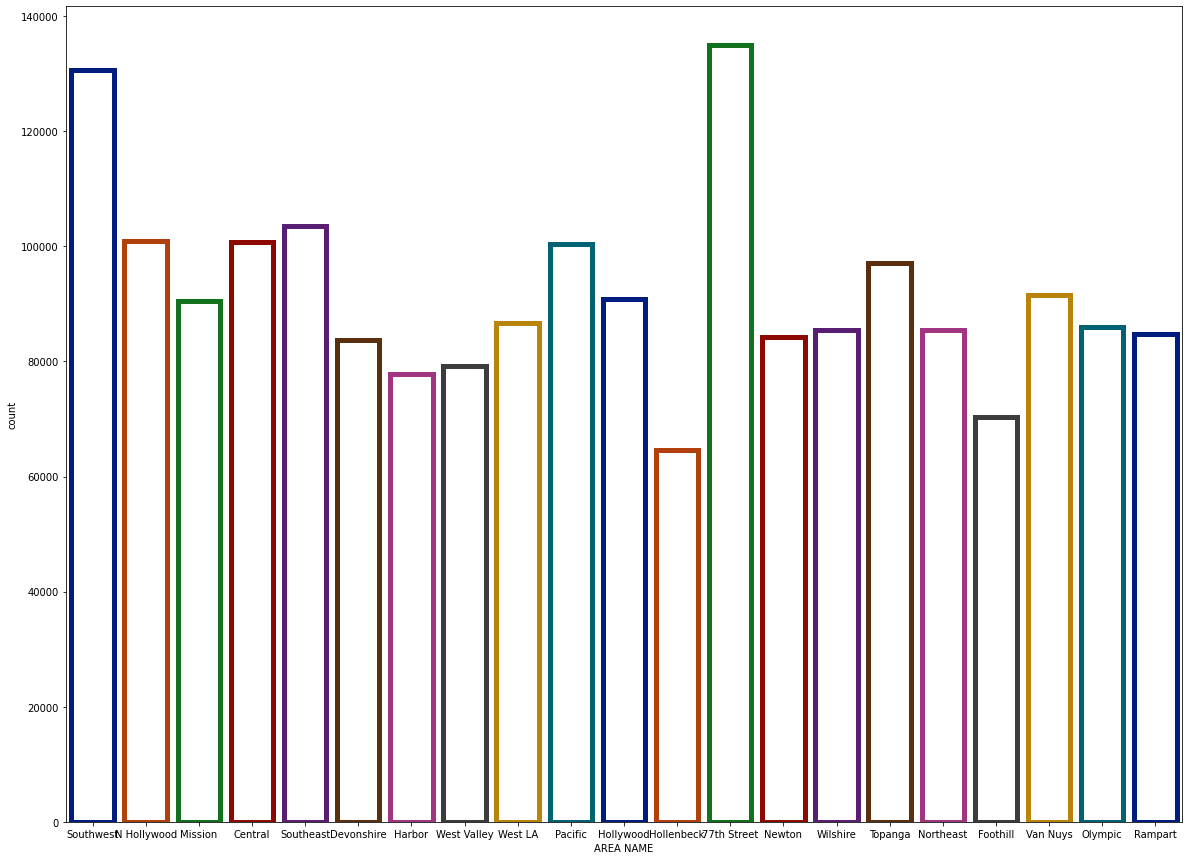

In [ ]:
plt.figure(figsize=(20,15))
ax = sns.countplot(x="AREA NAME", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

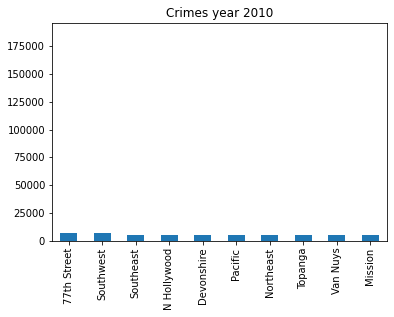

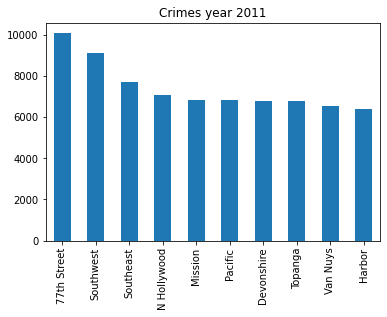

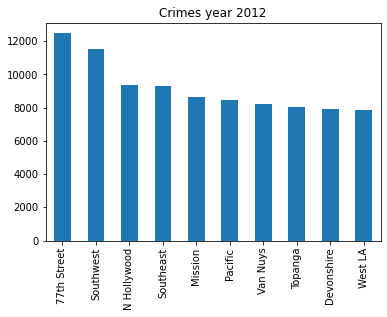

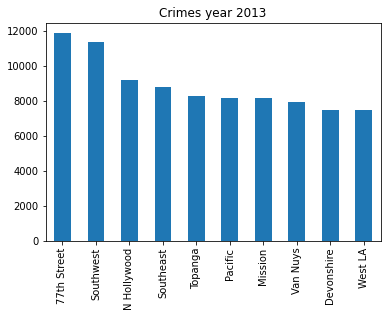

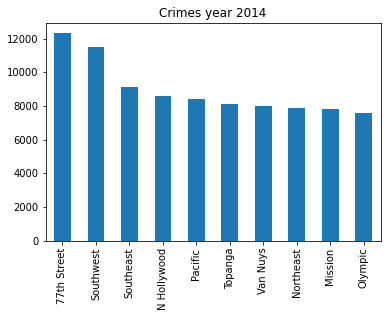

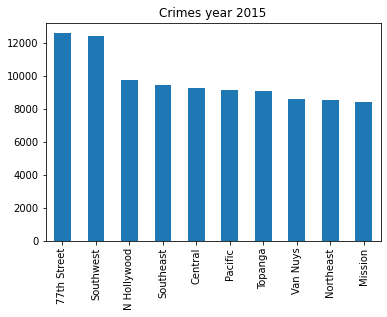

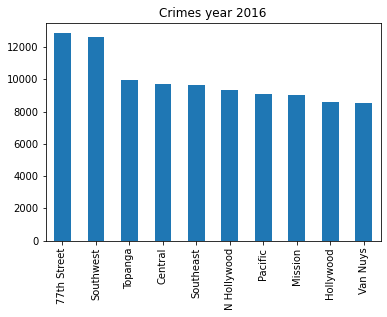

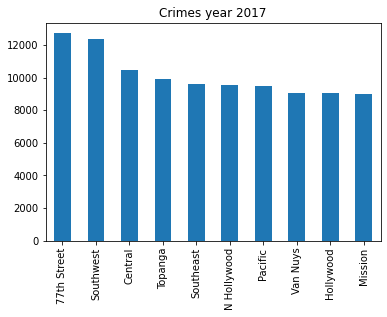

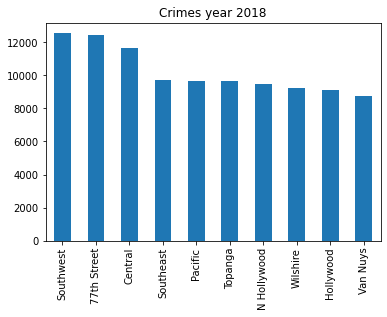

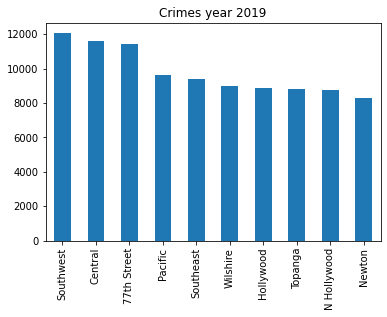

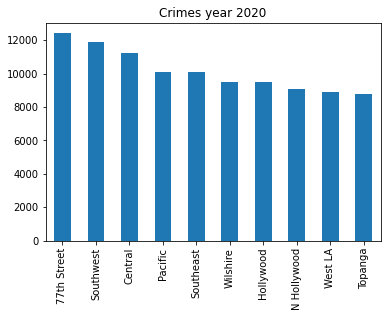

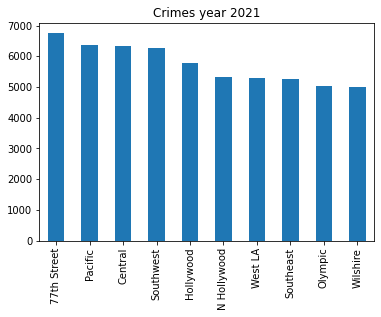

In [ ]:
crimeByYear = df['Year'].value_counts(sort=False).sort_index()
crimeByYear.plot(kind = 'line')
for year in crimeByYear.keys():
    crimeYear = df[df['Year'] == year]['AREA NAME'].value_counts()[:10]
    crimeYear = crimeYear.plot(kind = 'bar',title = "Crimes year " + str(year))
    plt.show()

In [ ]:
LAPDCalls.head(2)

Incident Number  Reporting District  ... Call_Type_Code Call_Type_Text
0     1.012310e+11               202.0  ...            NaN            NaN
1     1.012310e+11              1115.0  ...            NaN            NaN

[2 rows x 14 columns]

In [ ]:
LAPDCalls['Dispatch Date'] = LAPDCalls['Dispatch Date'].str.extract(r'(\d{4}-\d{2}-\d{2})') 
LAPDCalls['Dispatch Date'] = pd.to_datetime(LAPDCalls['Dispatch Date'], format='%Y-%m-%d')
LAPDCalls['Day'] = LAPDCalls['Dispatch Date'].dt.day_name()
LAPDCalls['Month'] = LAPDCalls['Dispatch Date'].dt.month_name()
LAPDCalls['Year'] = LAPDCalls['Dispatch Date'].dt.year

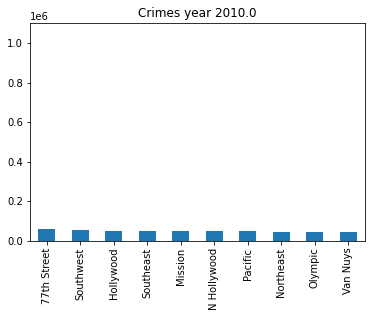

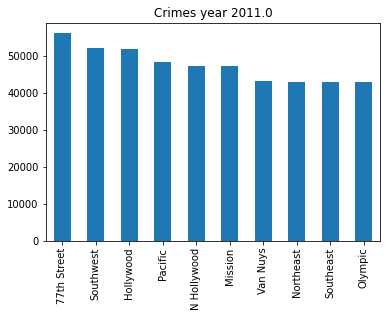

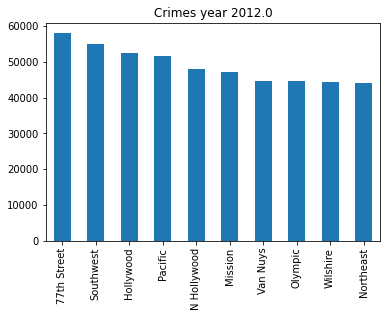

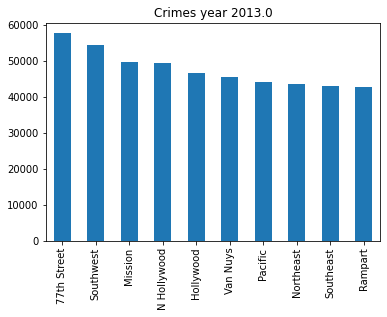

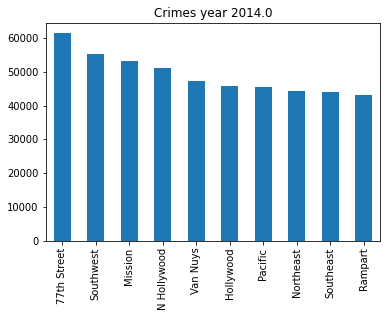

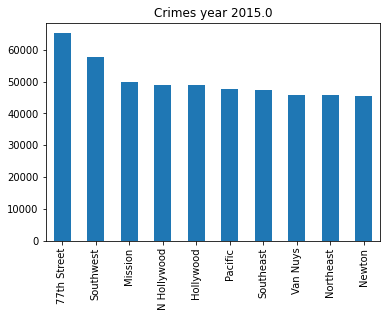

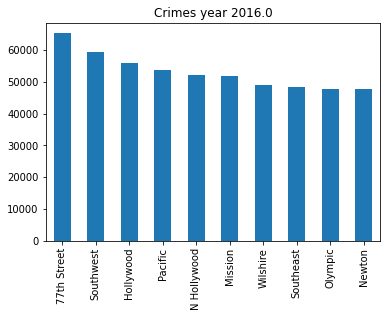

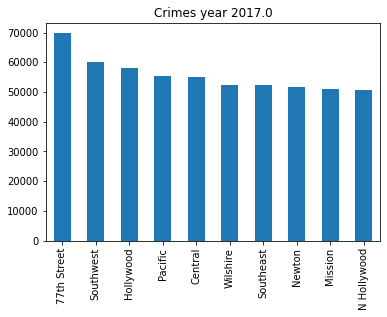

In [ ]:
crimeByYear = LAPDCalls['Year'].value_counts(sort=False).sort_index()
crimeByYear.plot(kind = 'line')
for year in crimeByYear.keys():
    crimeYear = LAPDCalls[LAPDCalls['Year'] == year]['Area Occurred'].value_counts()[:10]
    crimeYear = crimeYear.plot(kind = 'bar',title = "Crimes year " + str(year))
    plt.show()

In [ ]:
import xlrd
import random
import pandas as pd
import seaborn as sns
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [ ]:
fp = "/content/geo_export_6bc0979d-b223-4f2f-bdc2-3b836f79bdf1.shp"
map_df = gpd.read_file(fp)
map_df.head()

display_na  ...                                           geometry
0           Acton L.A. County Neighborhood (Current)  ...  POLYGON ((-118.20262 34.53899, -118.18947 34.5...
1  Adams-Normandie L.A. County Neighborhood (Curr...  ...  POLYGON ((-118.30901 34.03741, -118.30041 34.0...
2    Agoura Hills L.A. County Neighborhood (Current)  ...  POLYGON ((-118.76193 34.16820, -118.72632 34.1...
3      Agua Dulce L.A. County Neighborhood (Current)  ...  POLYGON ((-118.25468 34.55830, -118.25551 34.5...
4        Alhambra L.A. County Neighborhood (Current)  ...  POLYGON ((-118.12175 34.10504, -118.11687 34.1...

[5 rows x 14 columns]

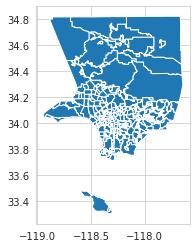

In [ ]:
map_df.plot()